measured is blue
simulated is red


/home/mgomaa/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


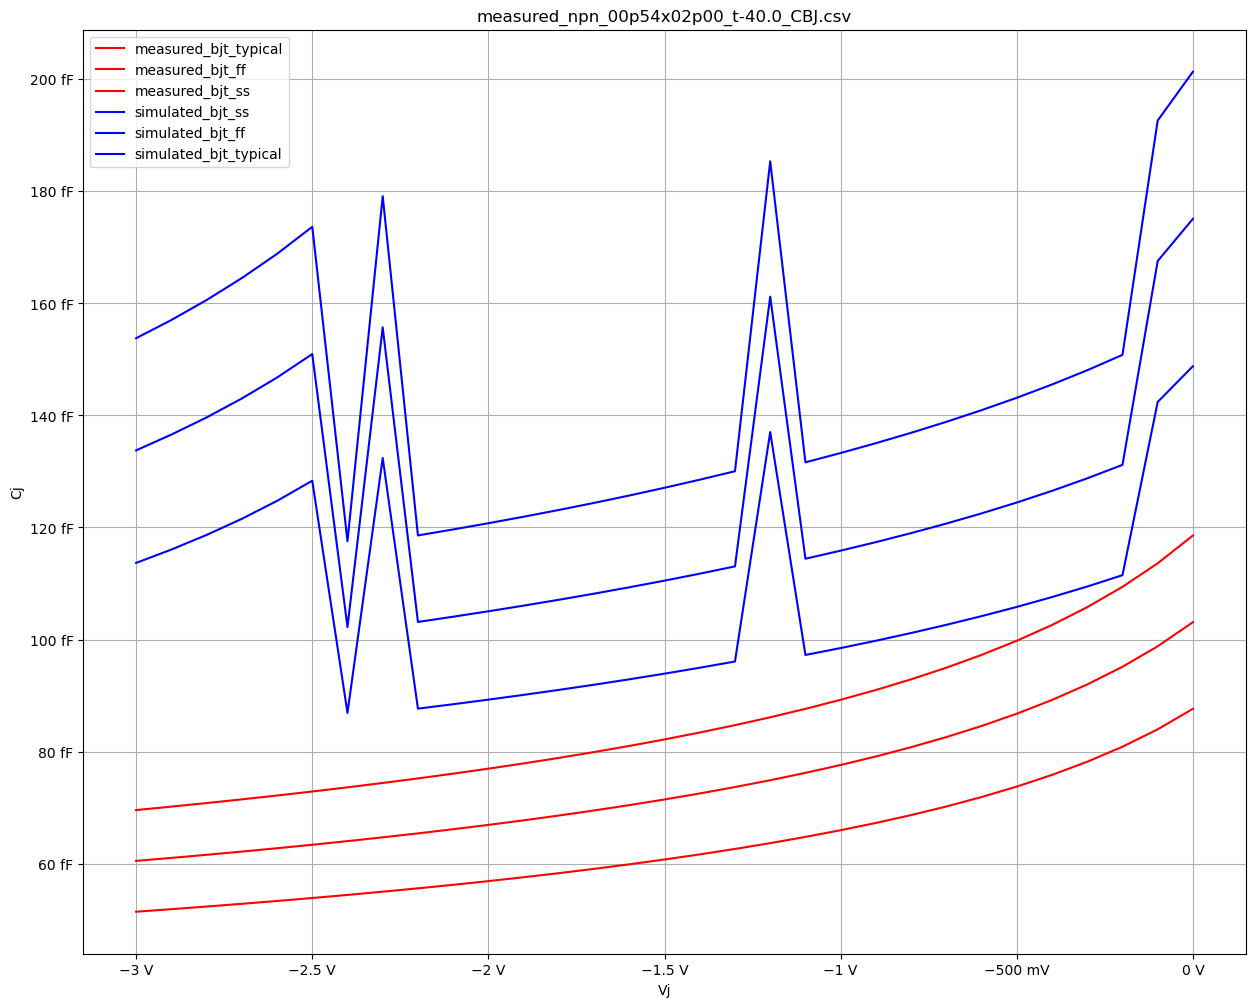

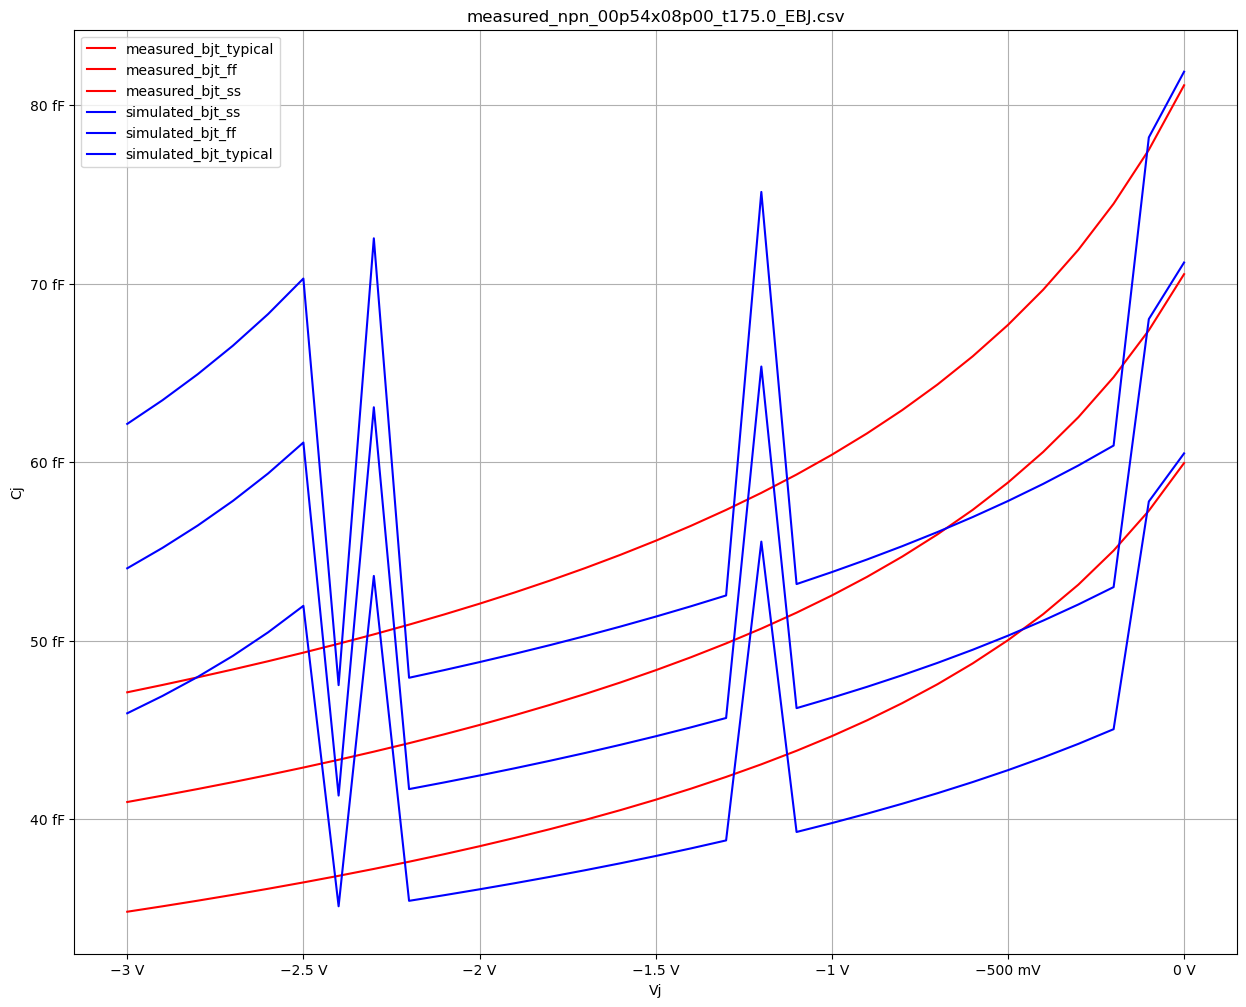

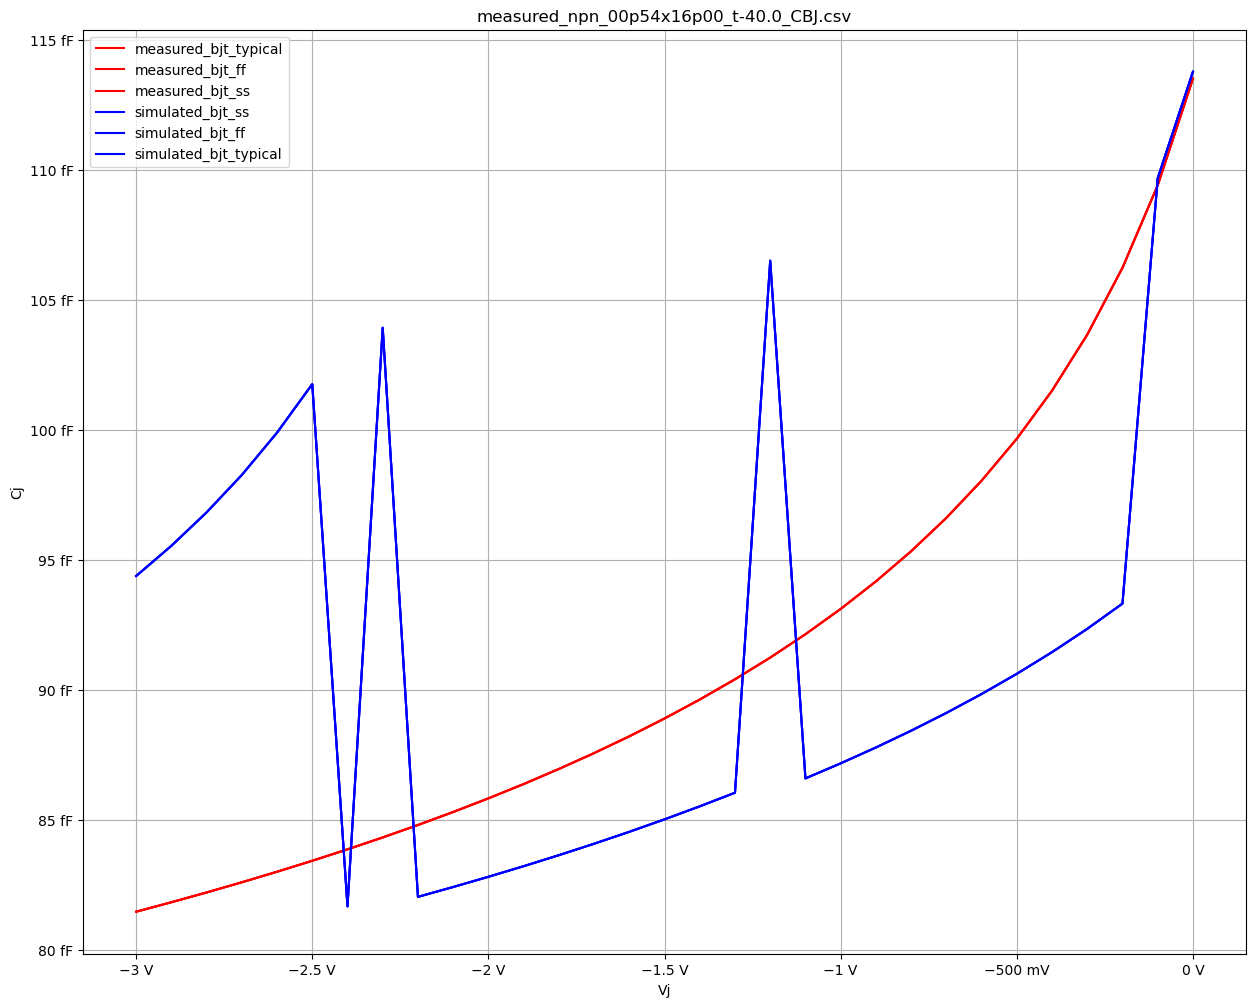

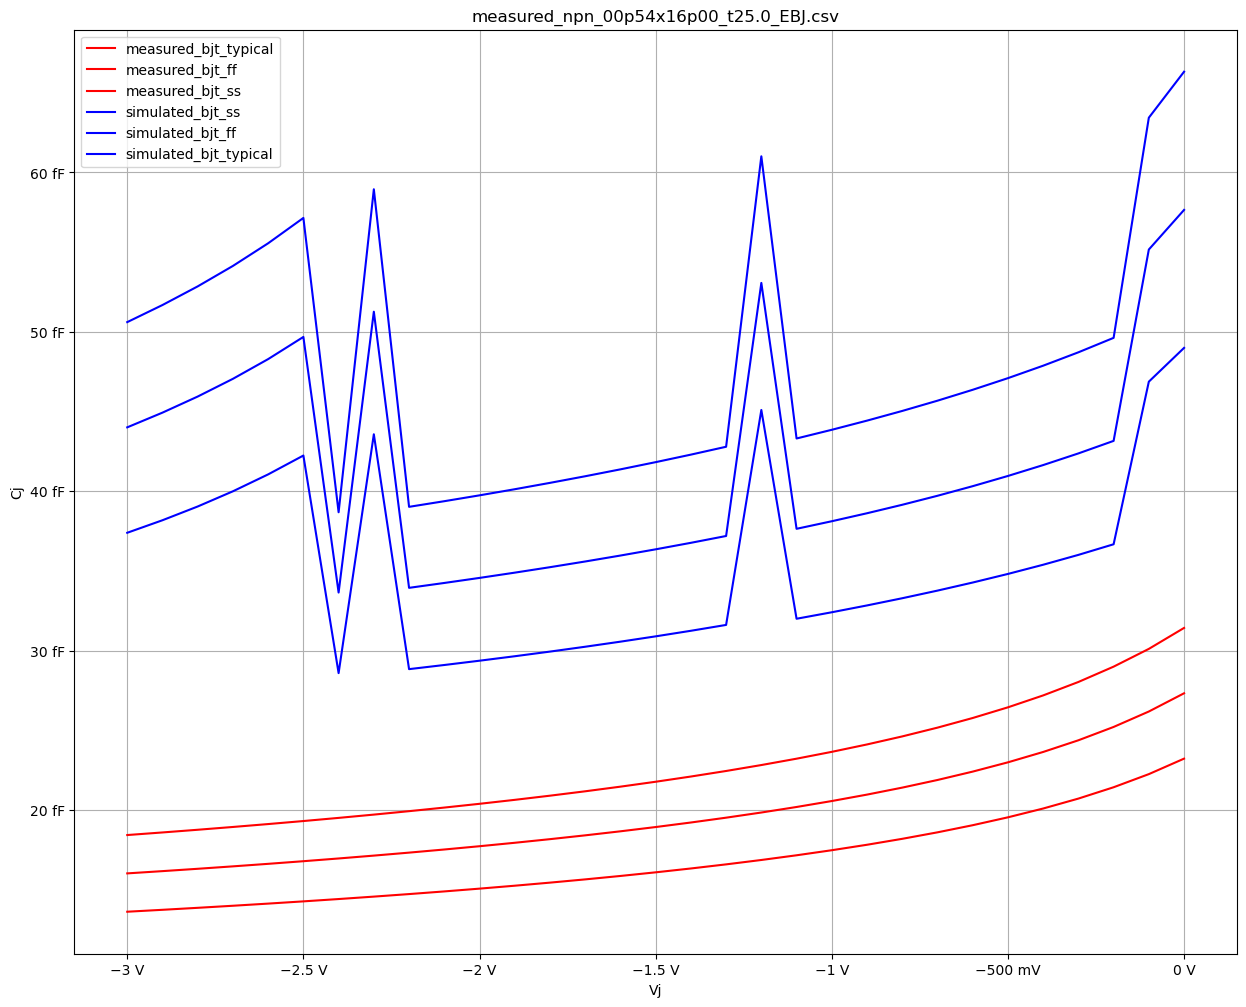

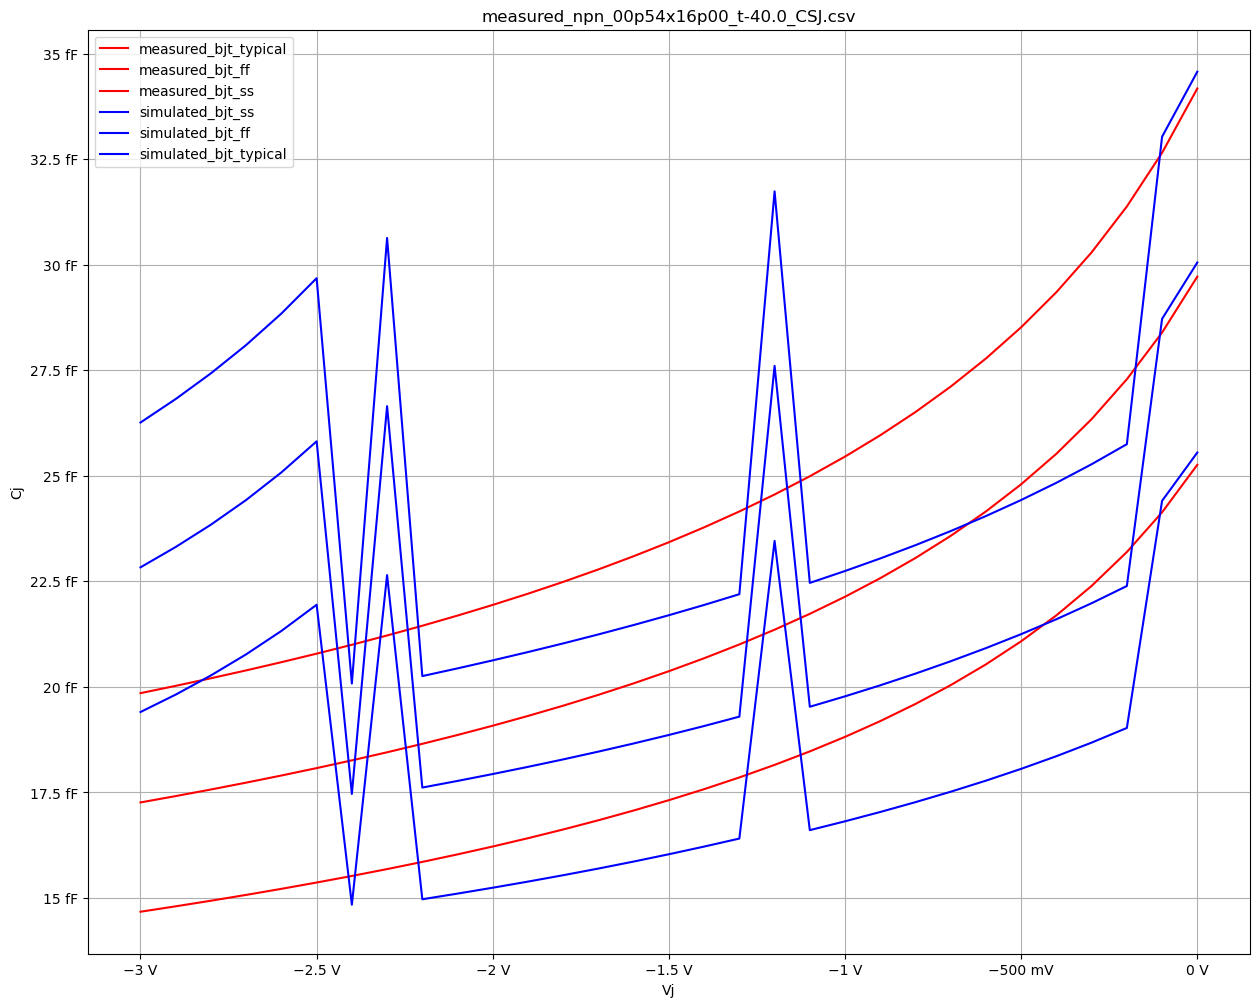

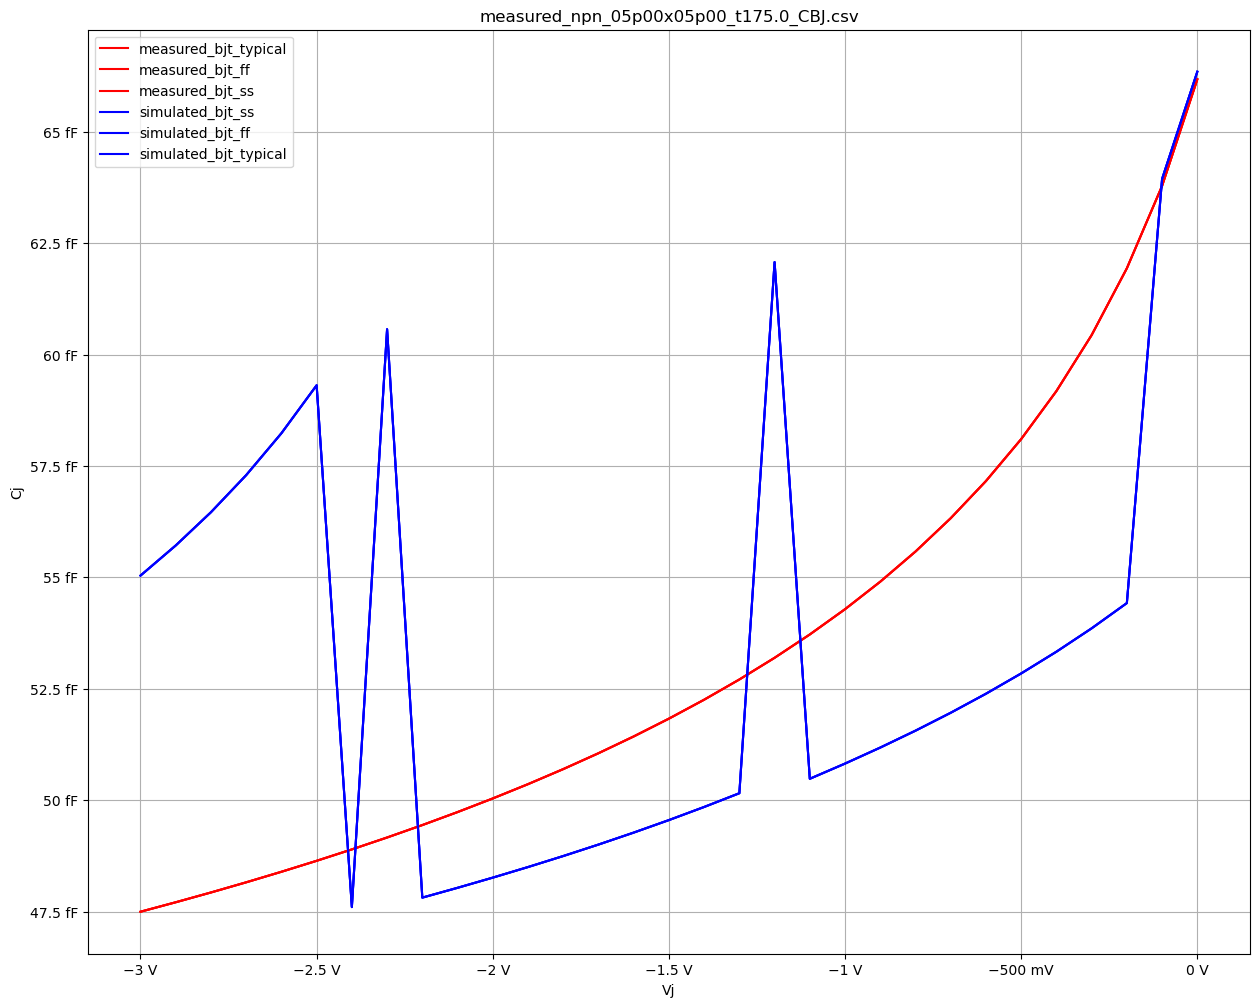

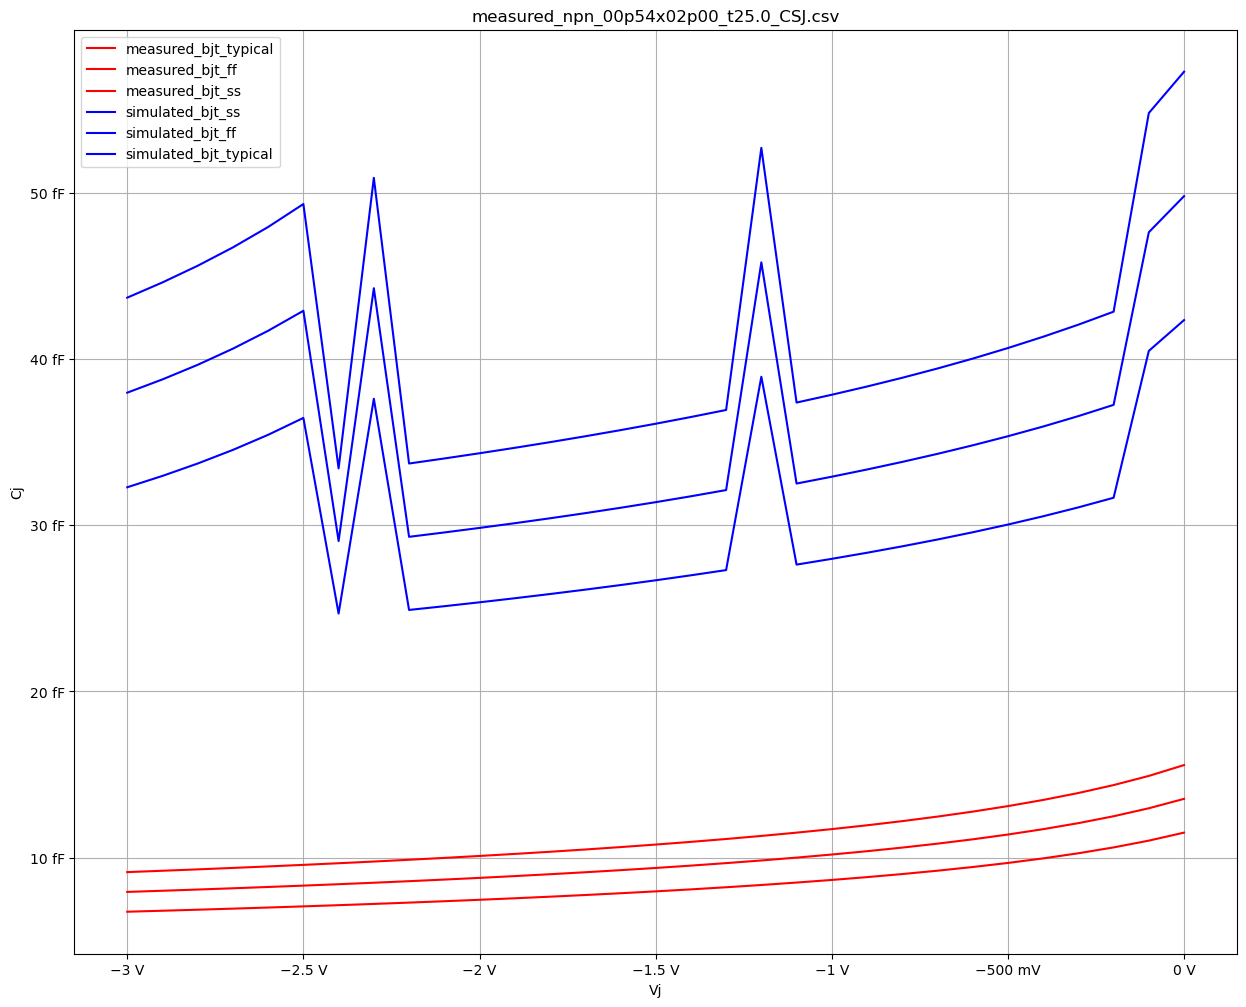

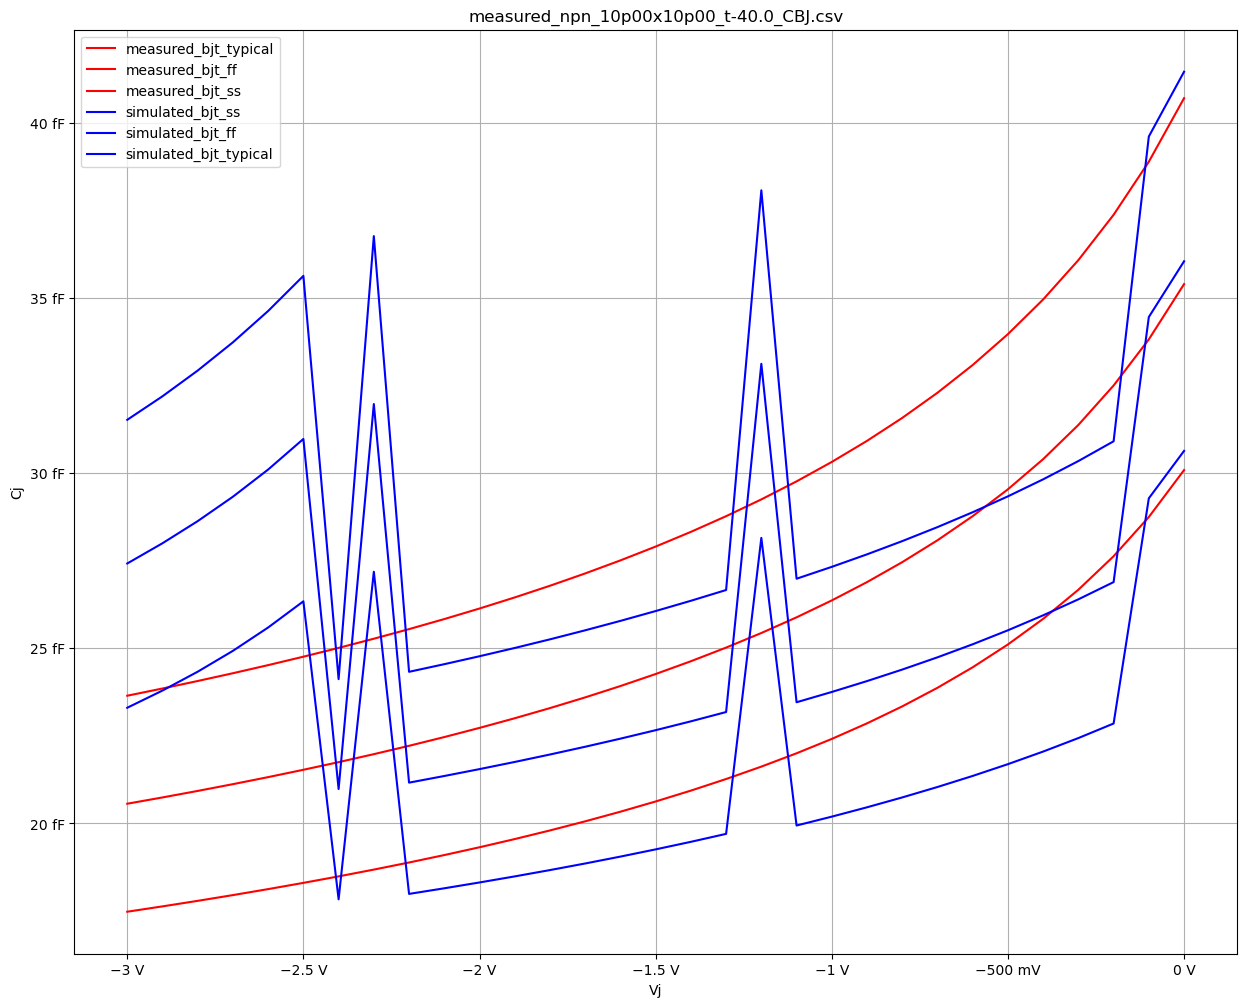

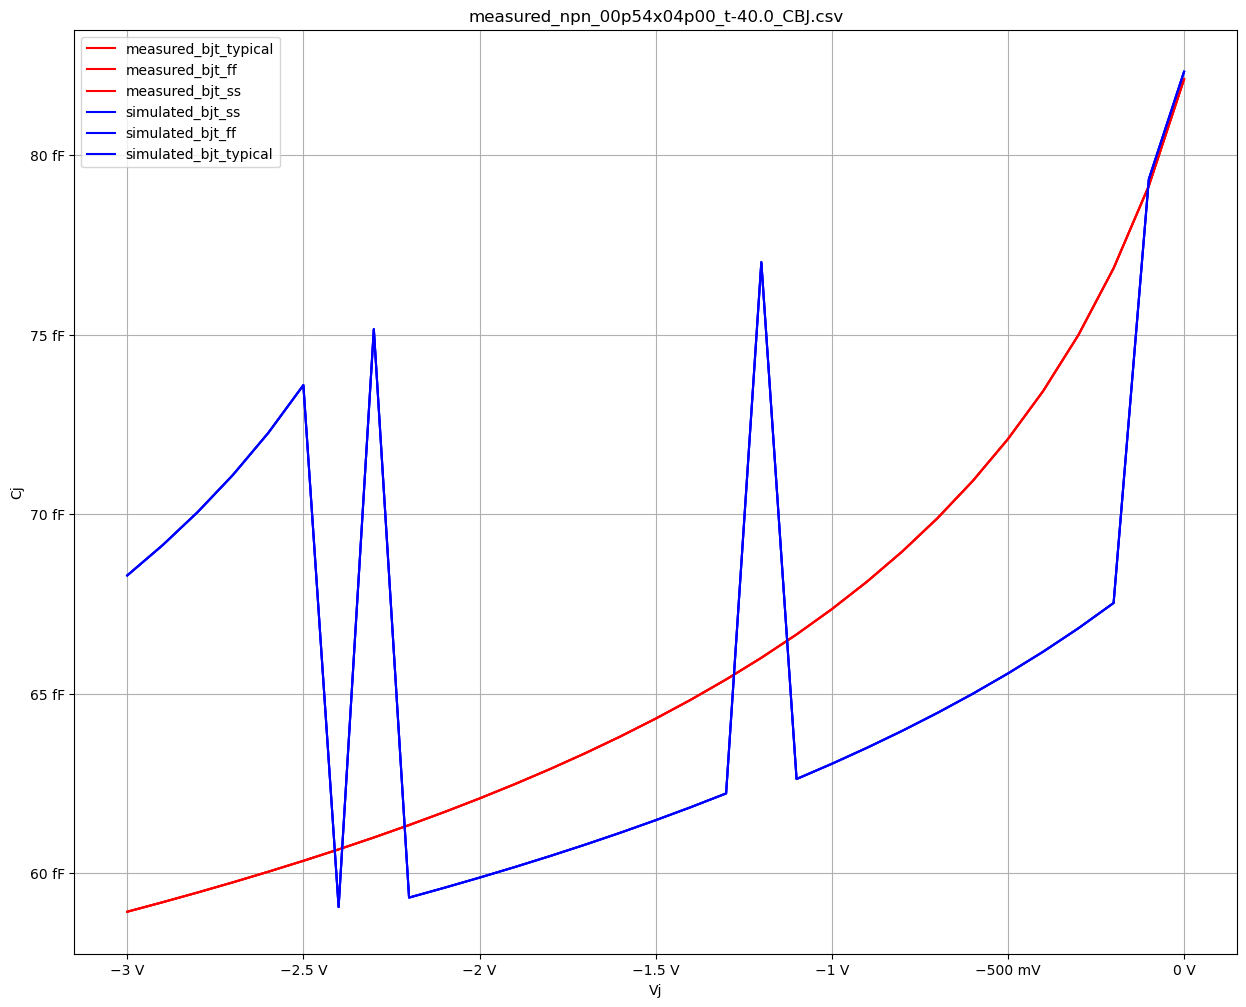

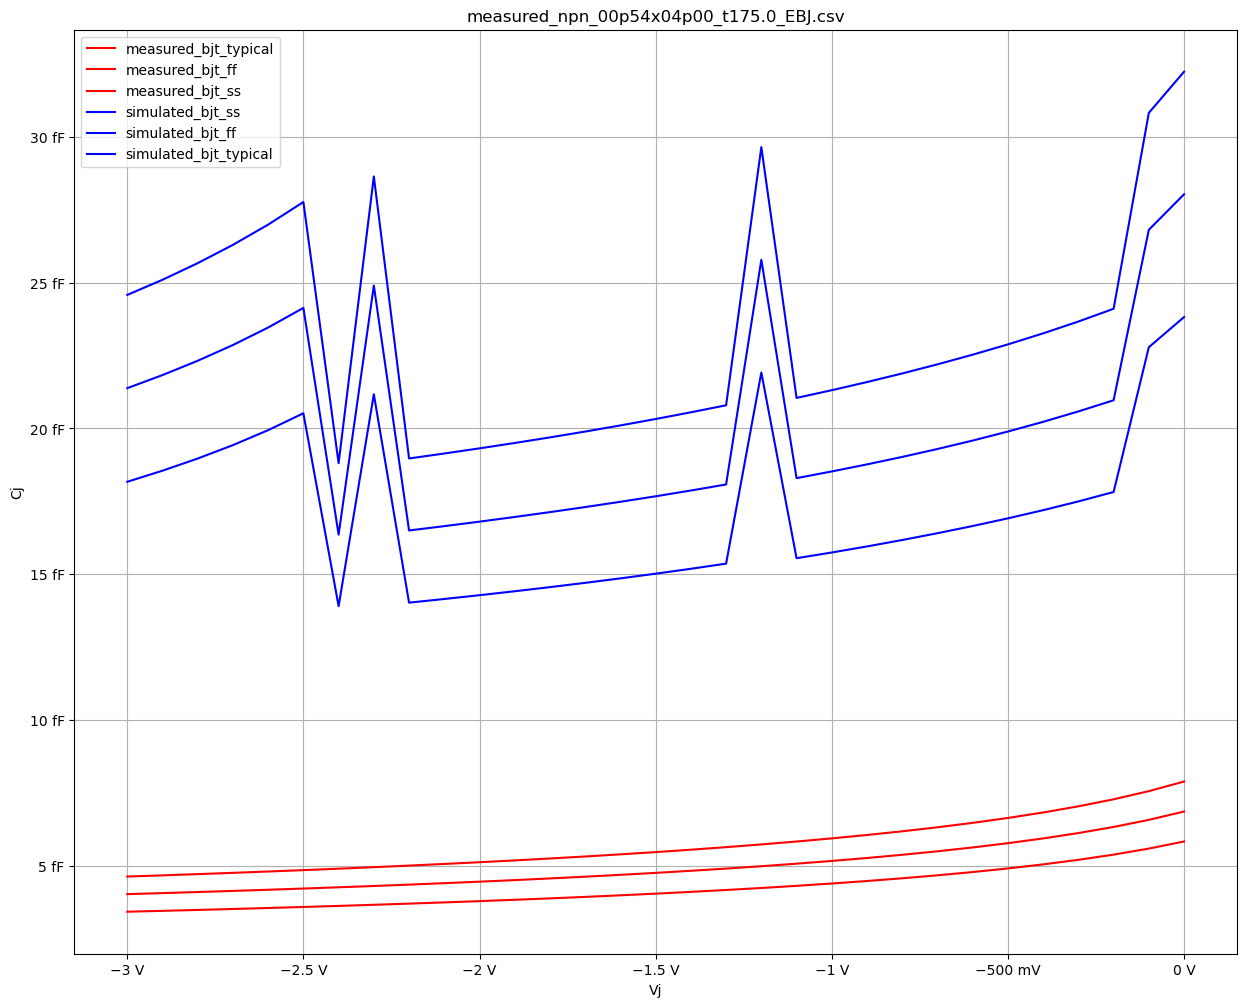

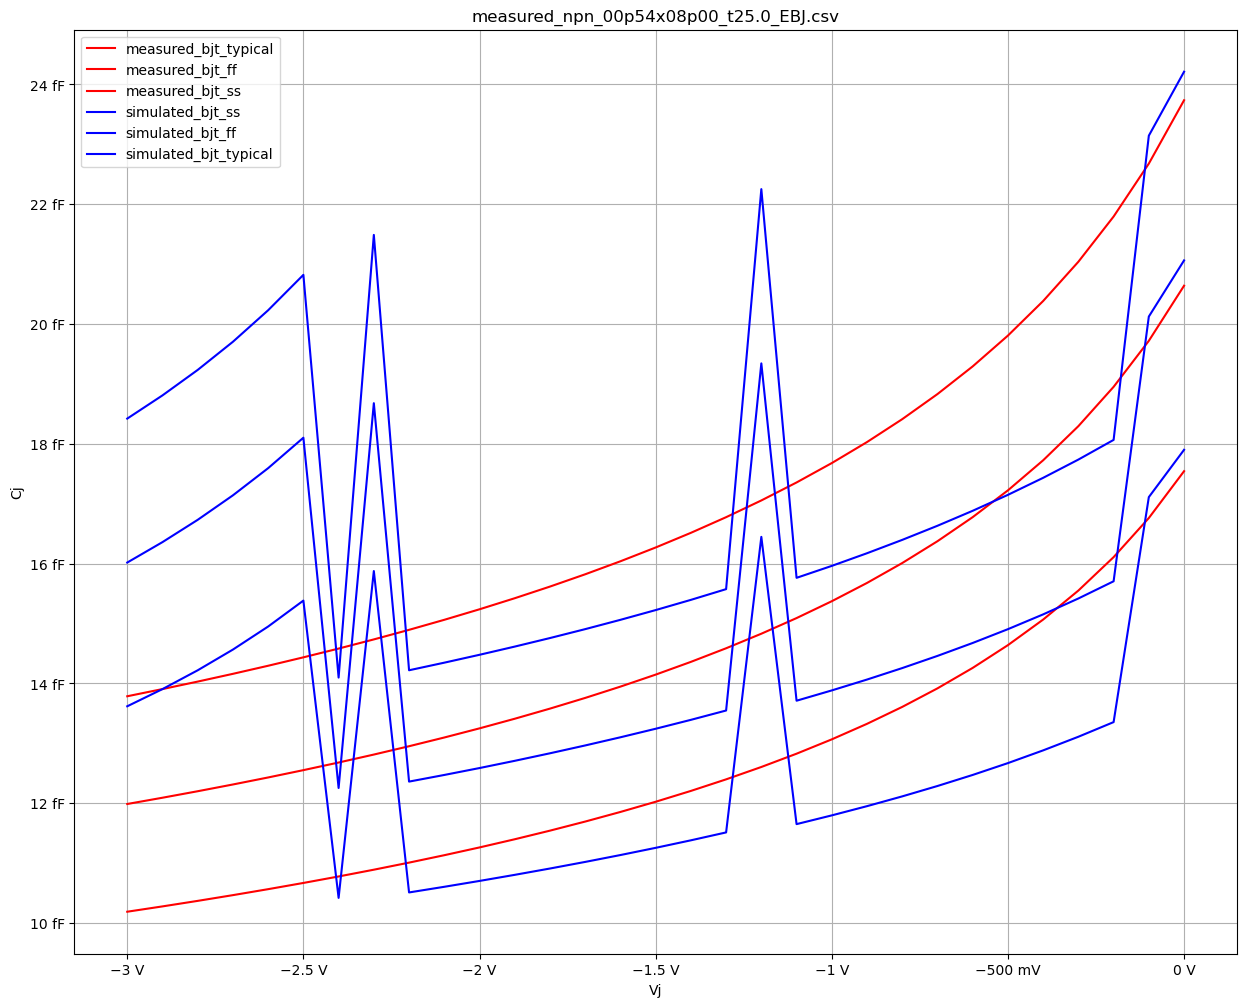

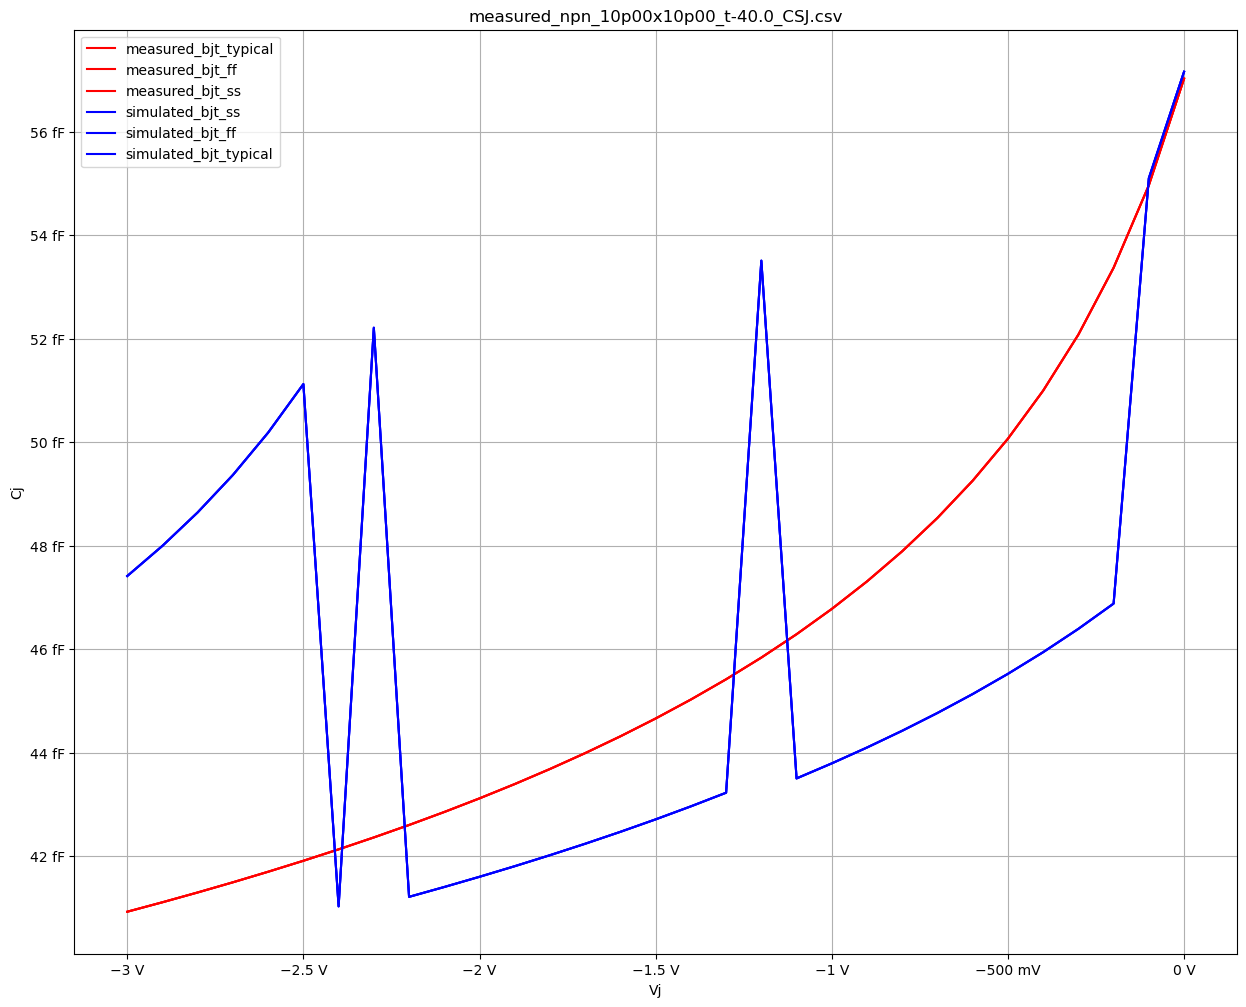

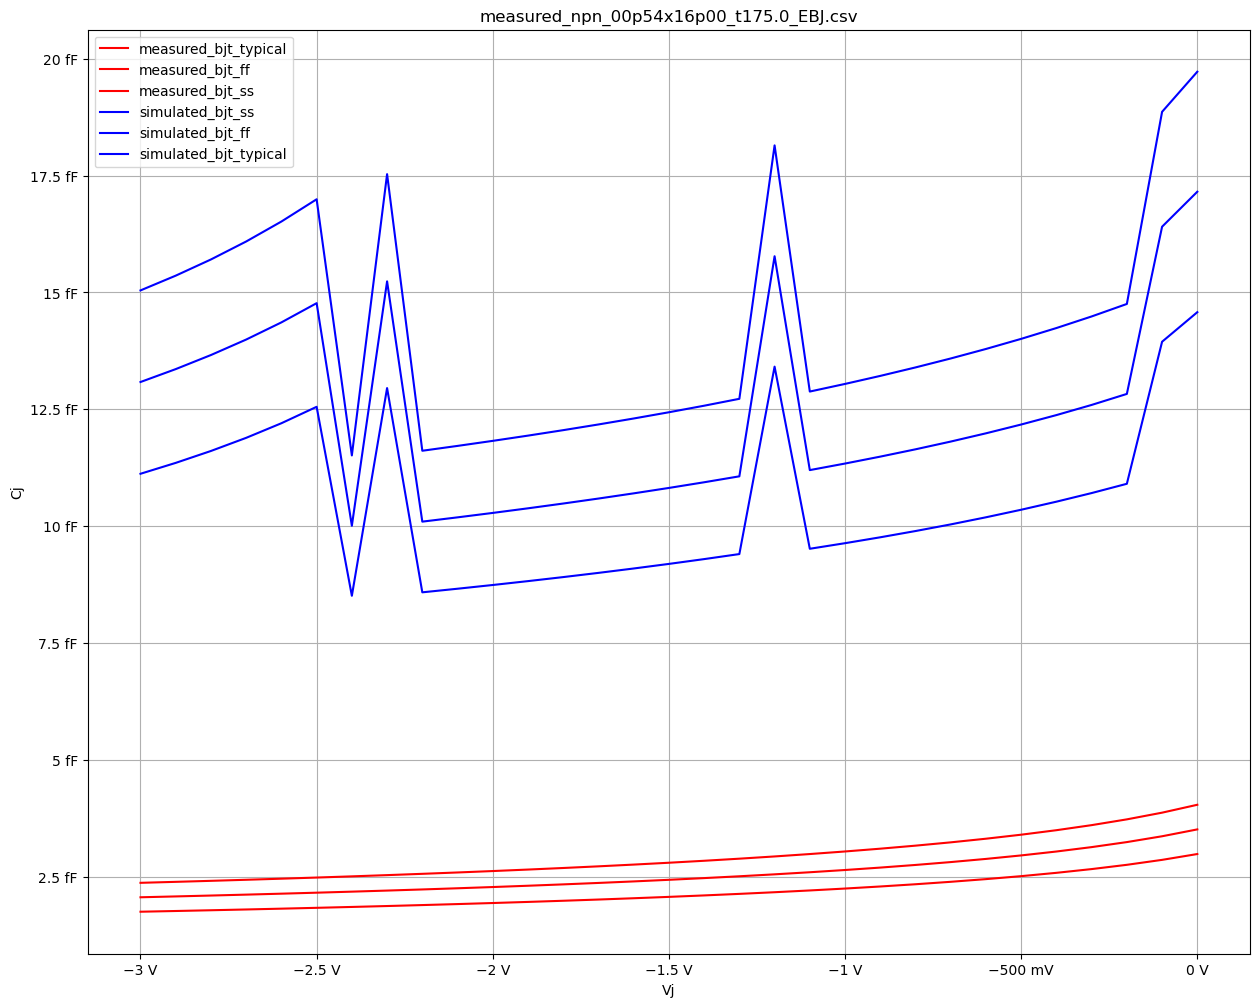

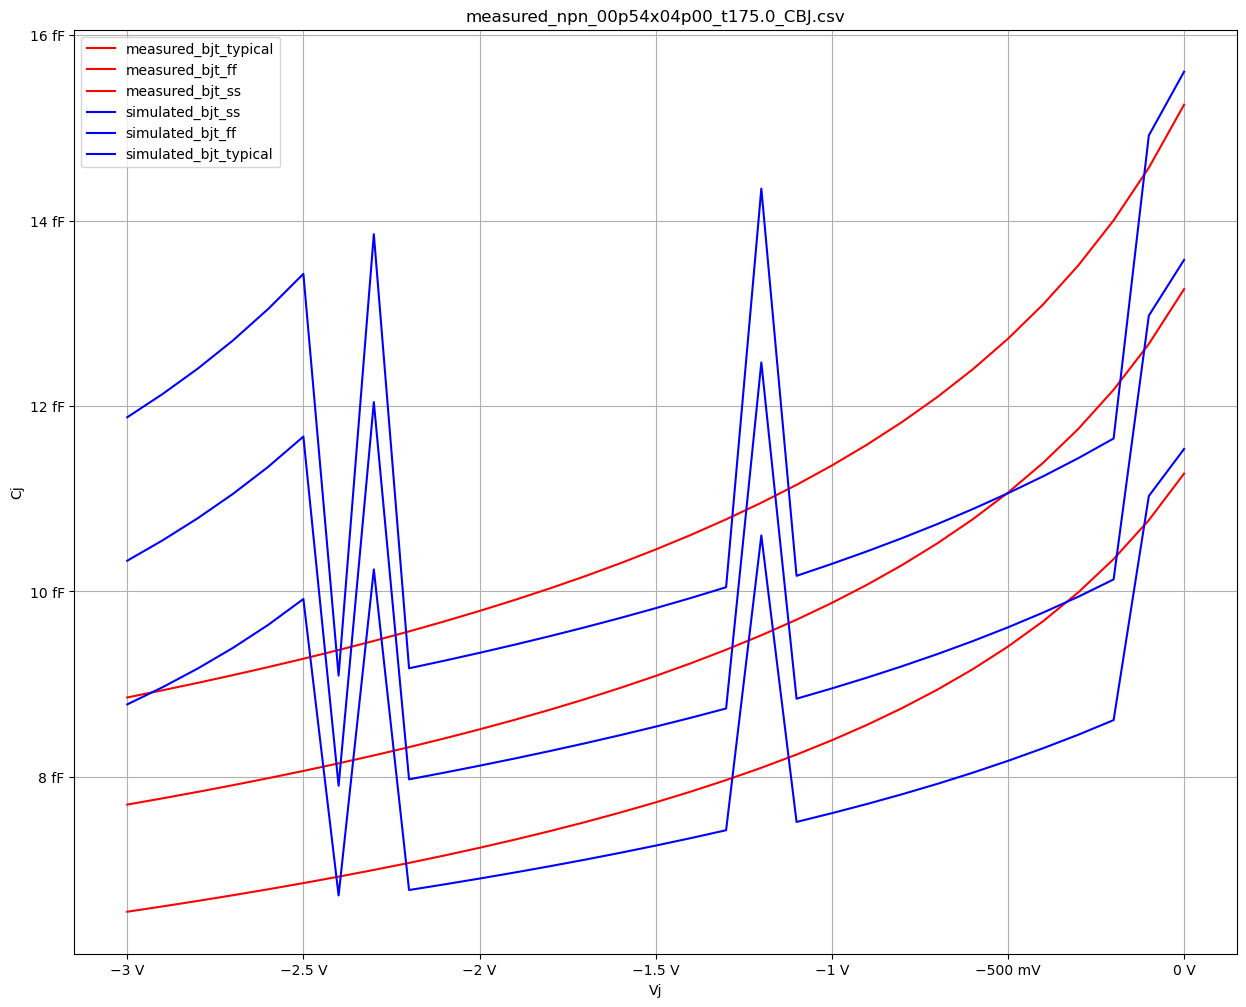

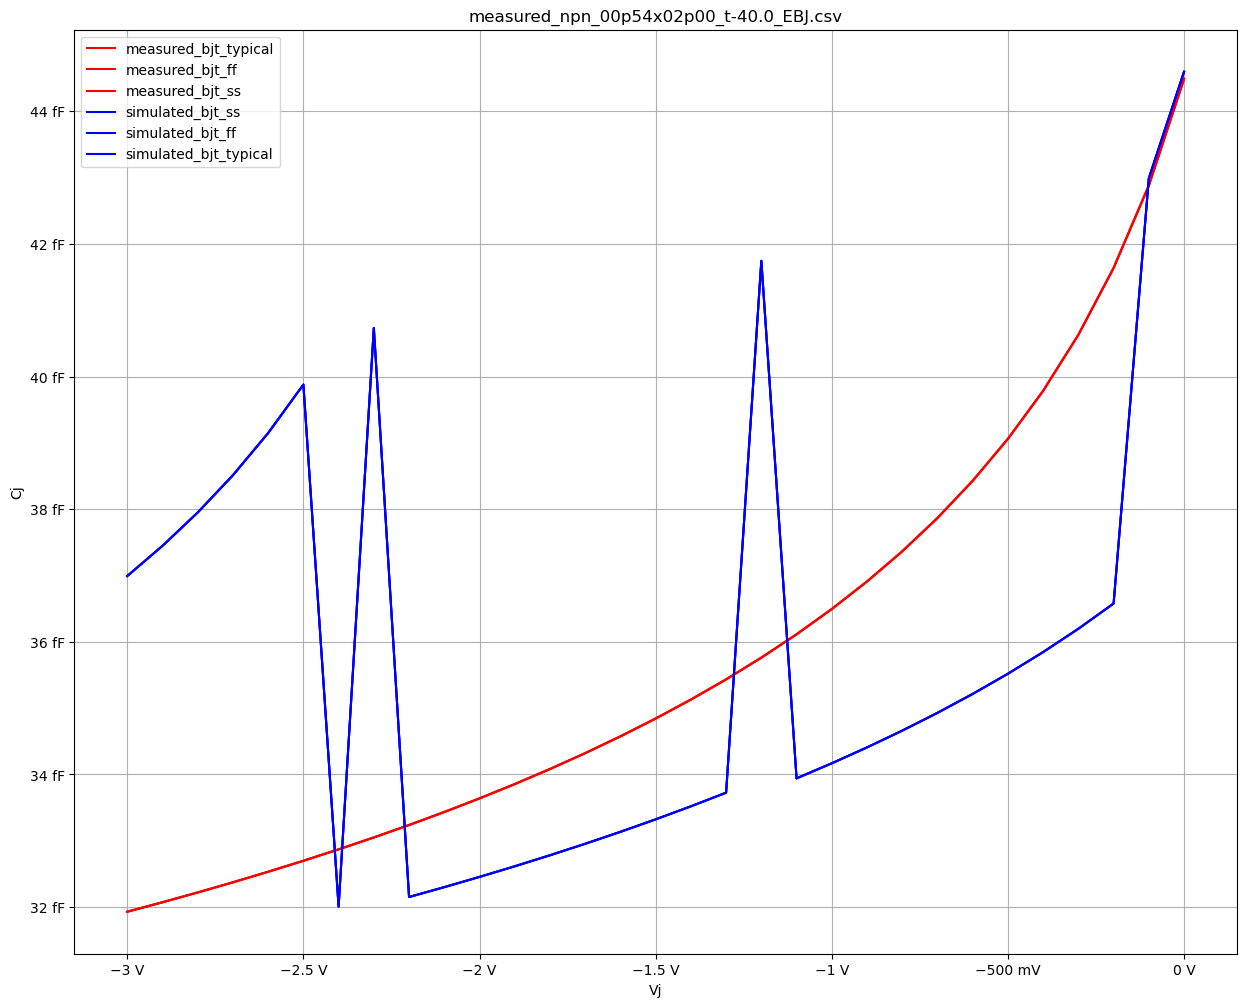

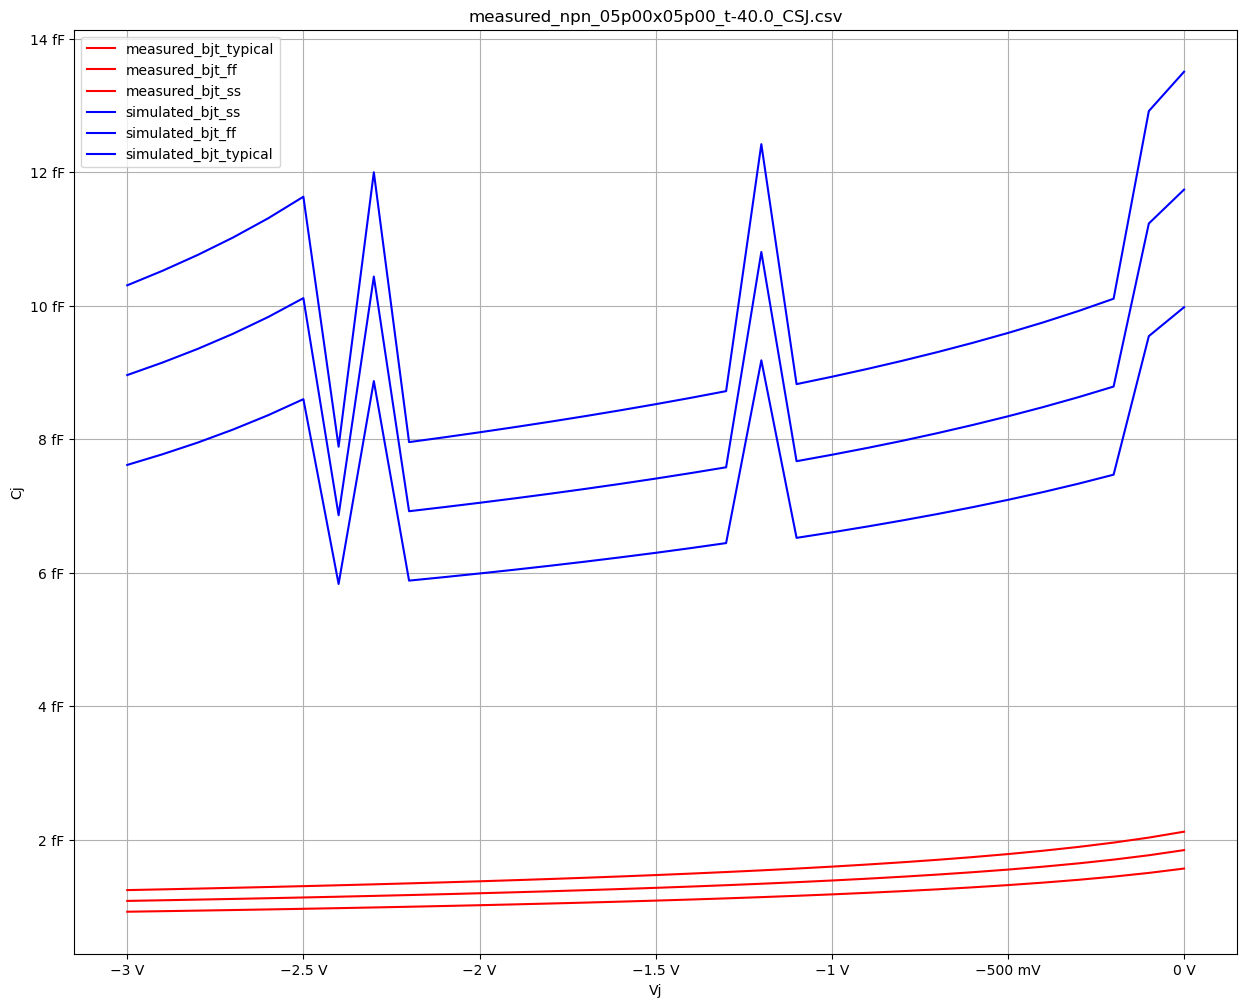

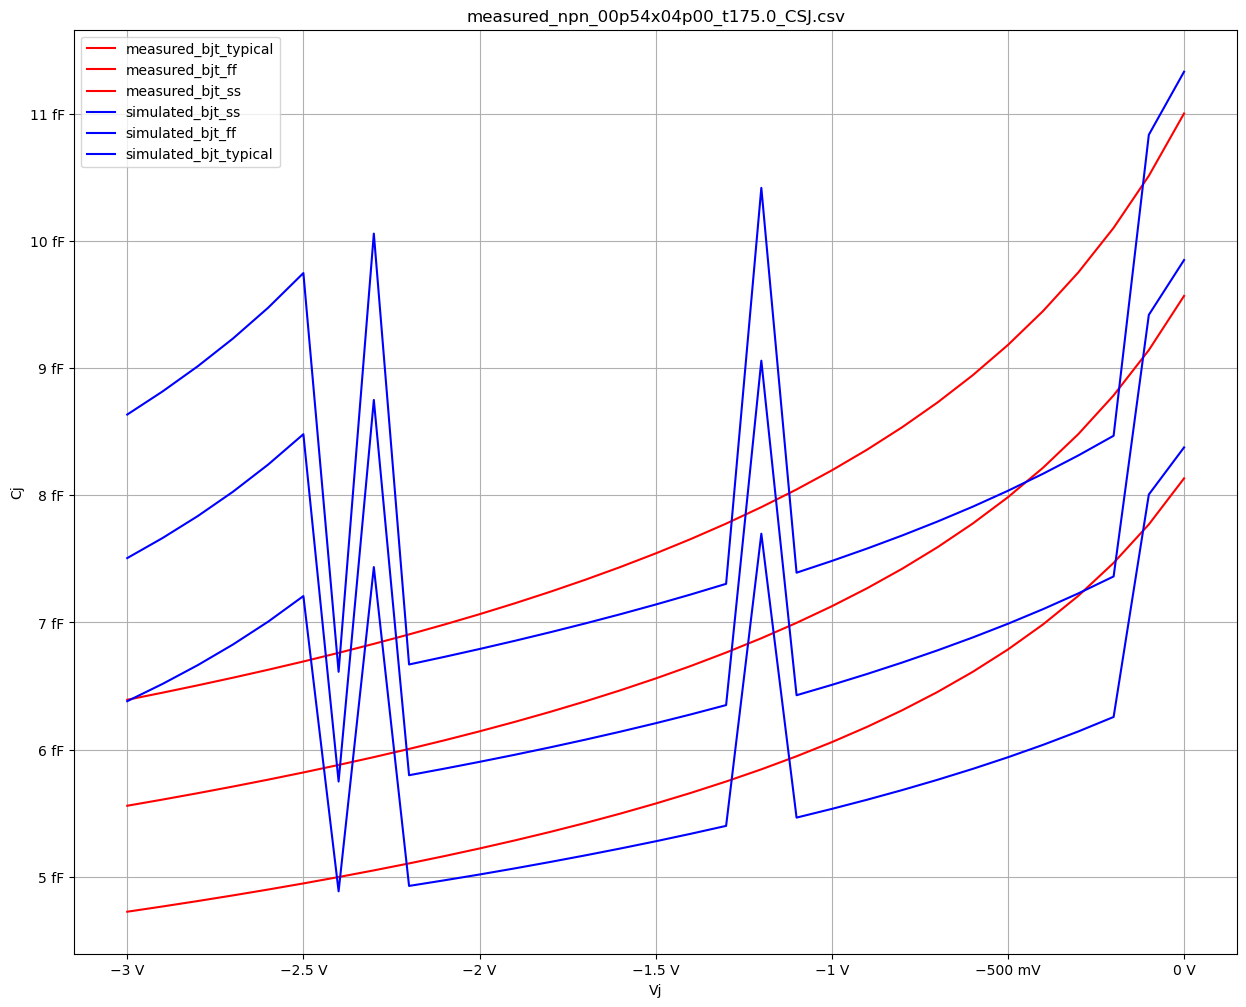

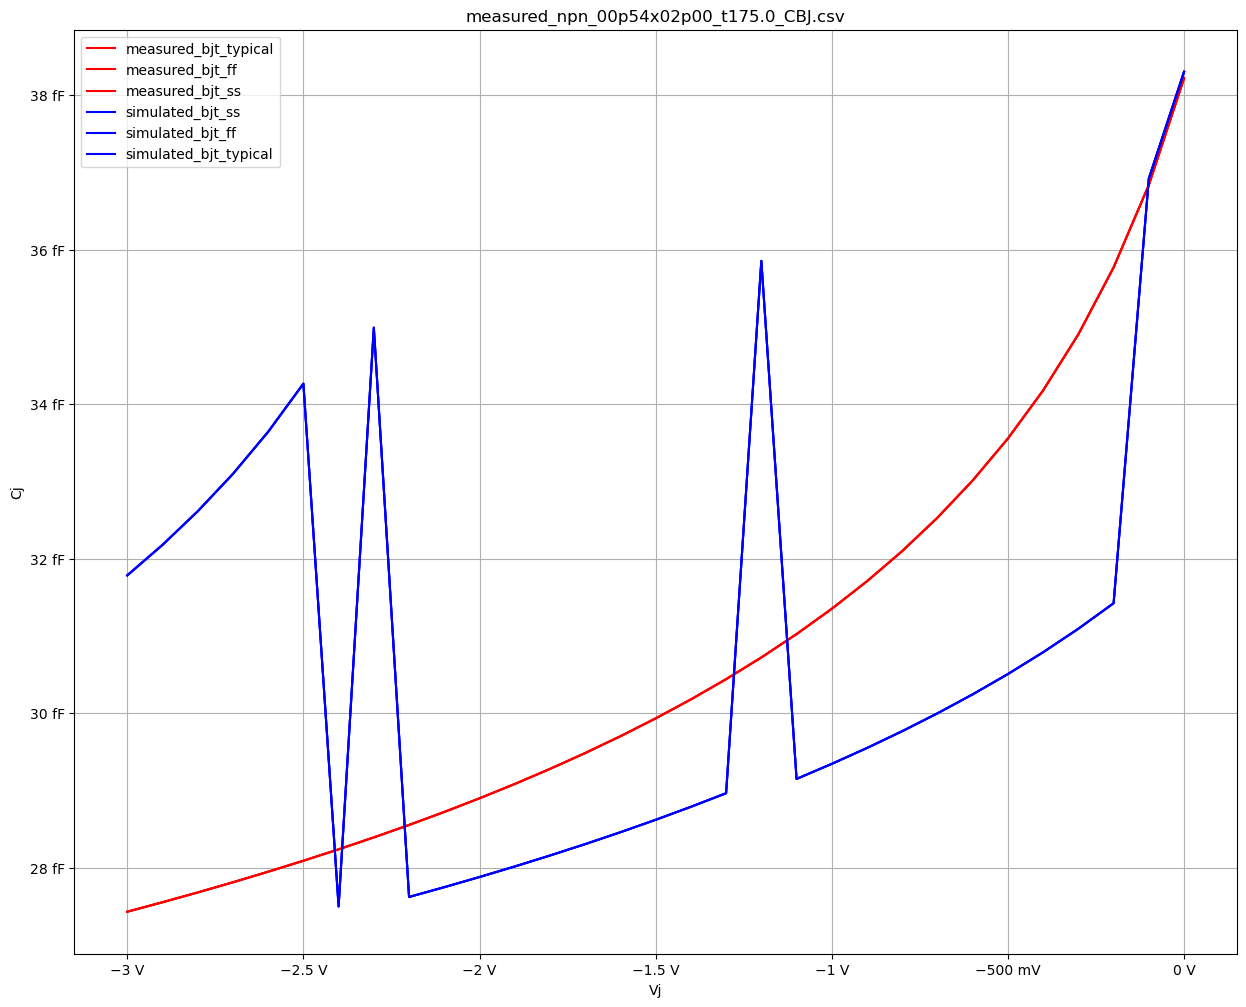

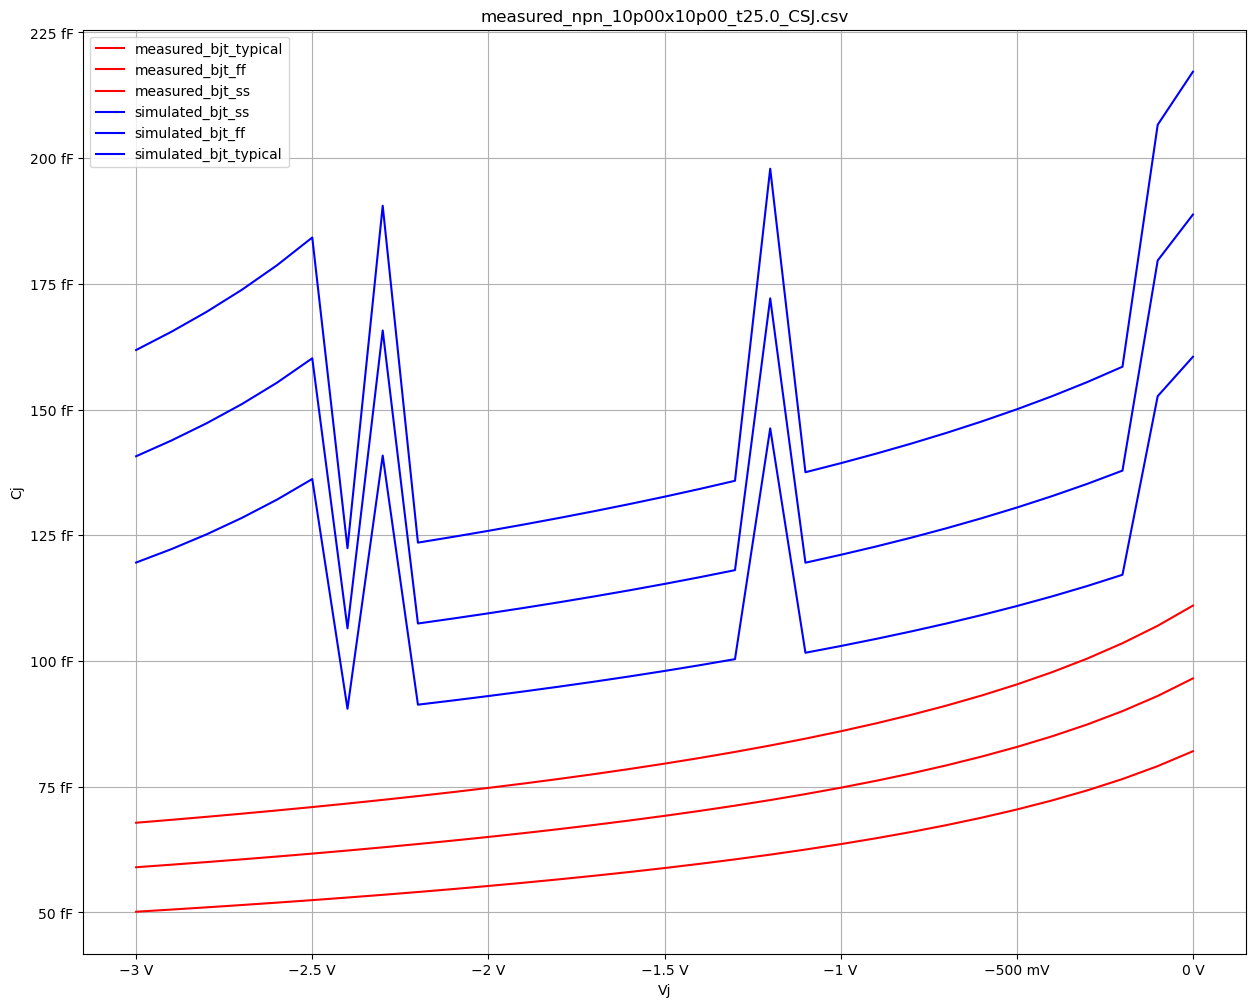

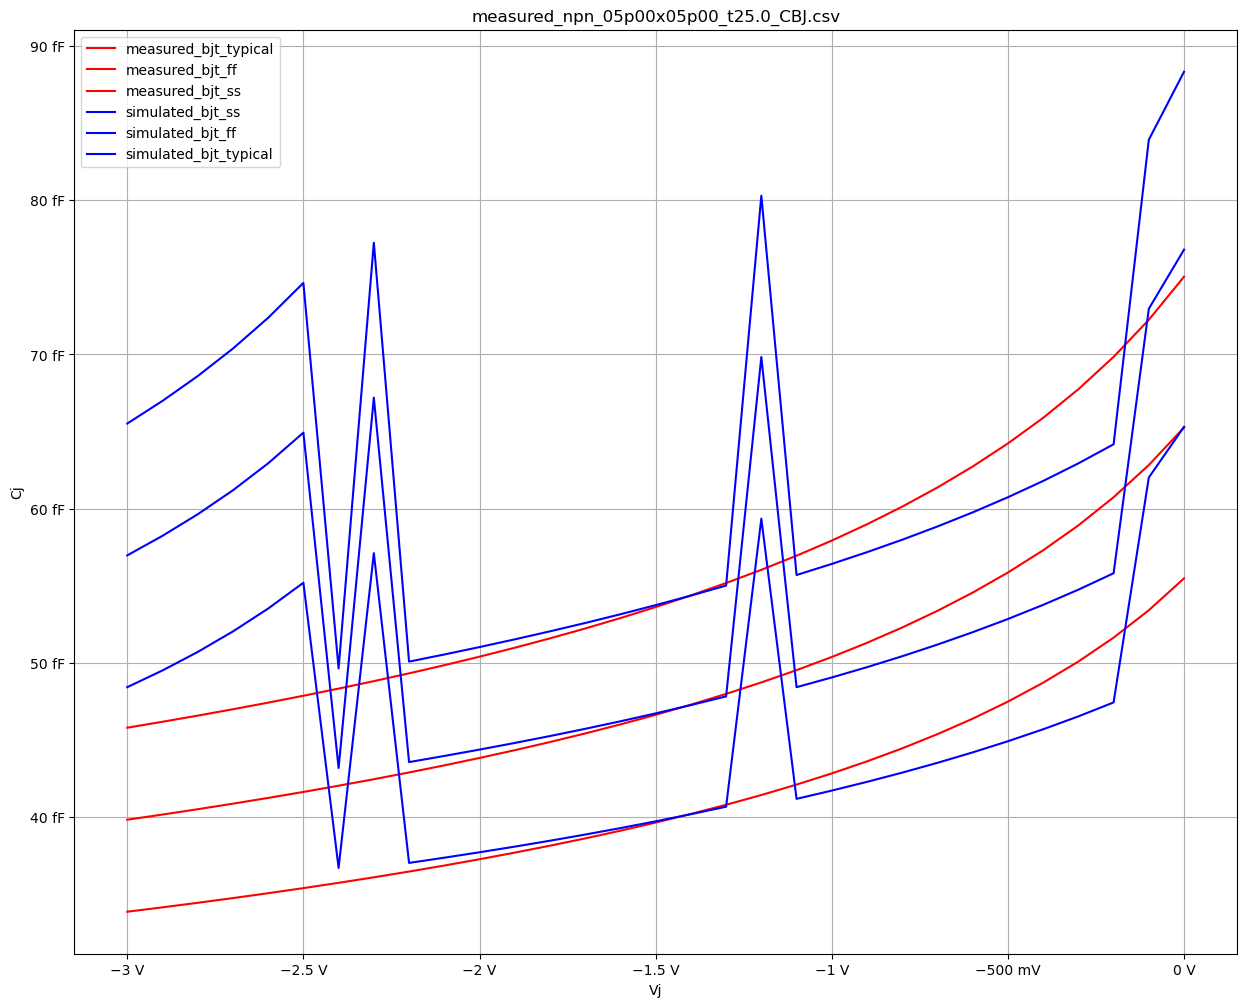

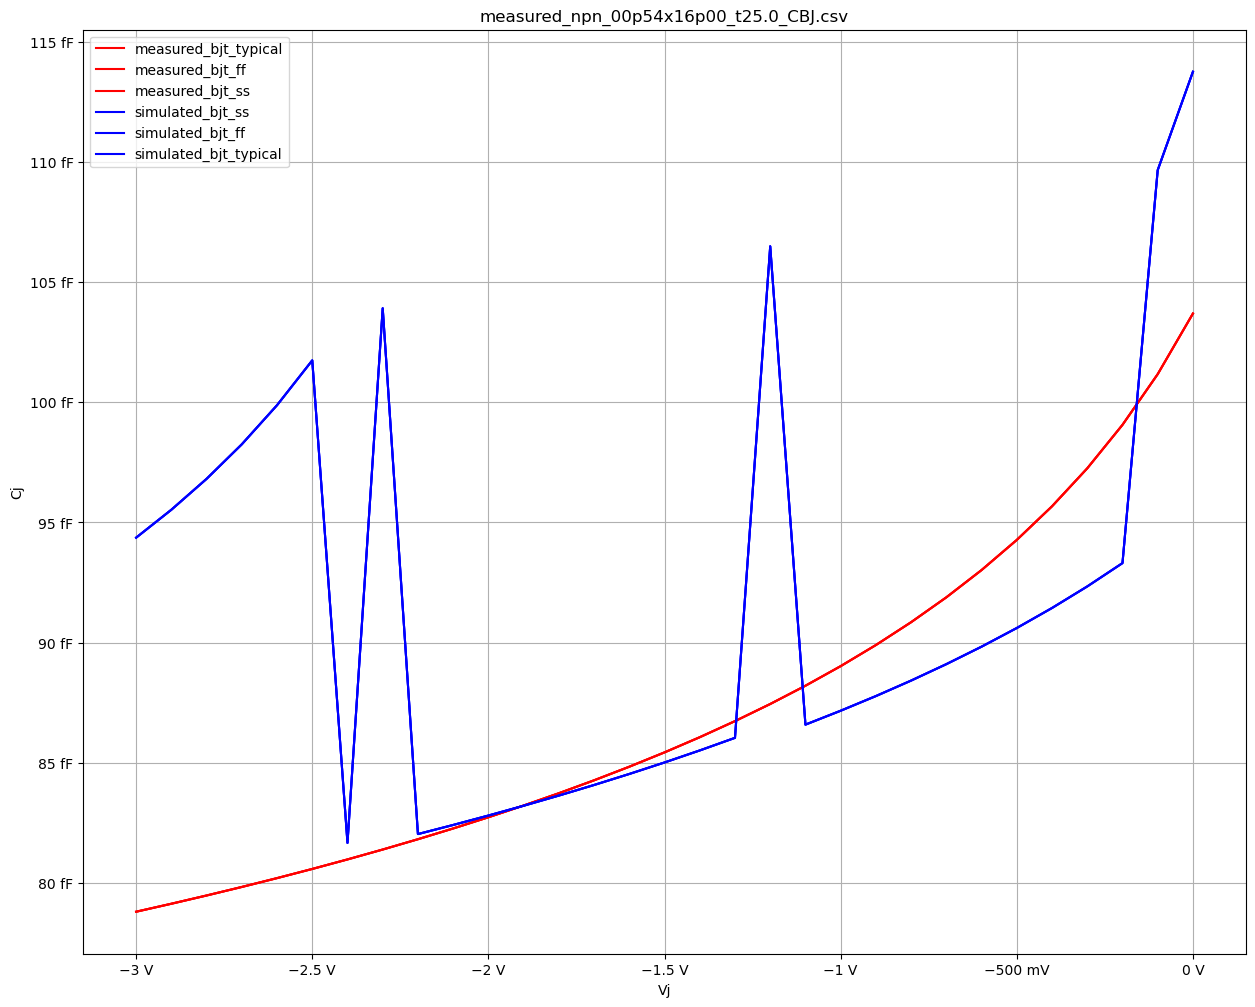

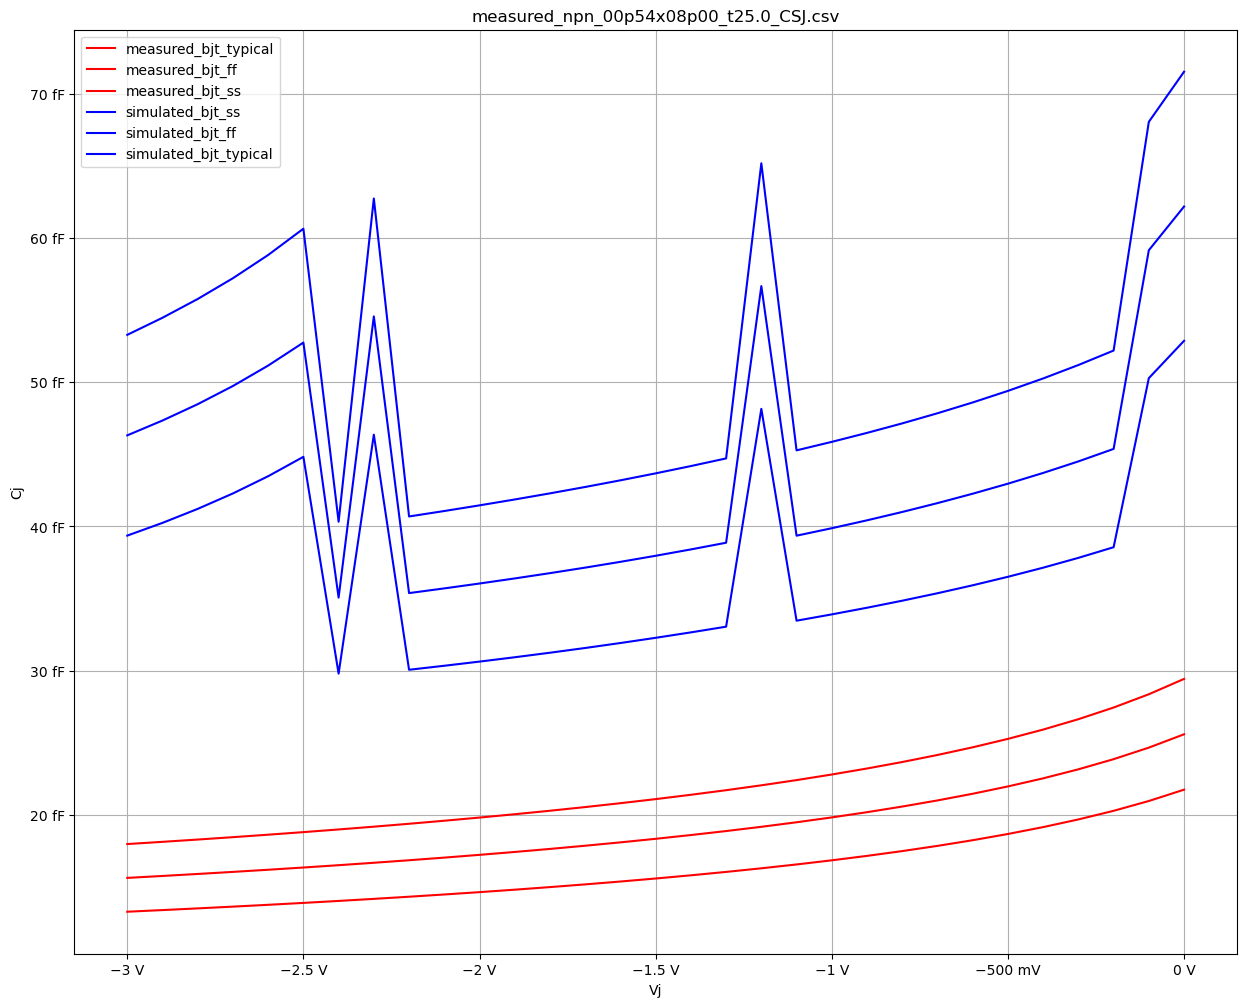

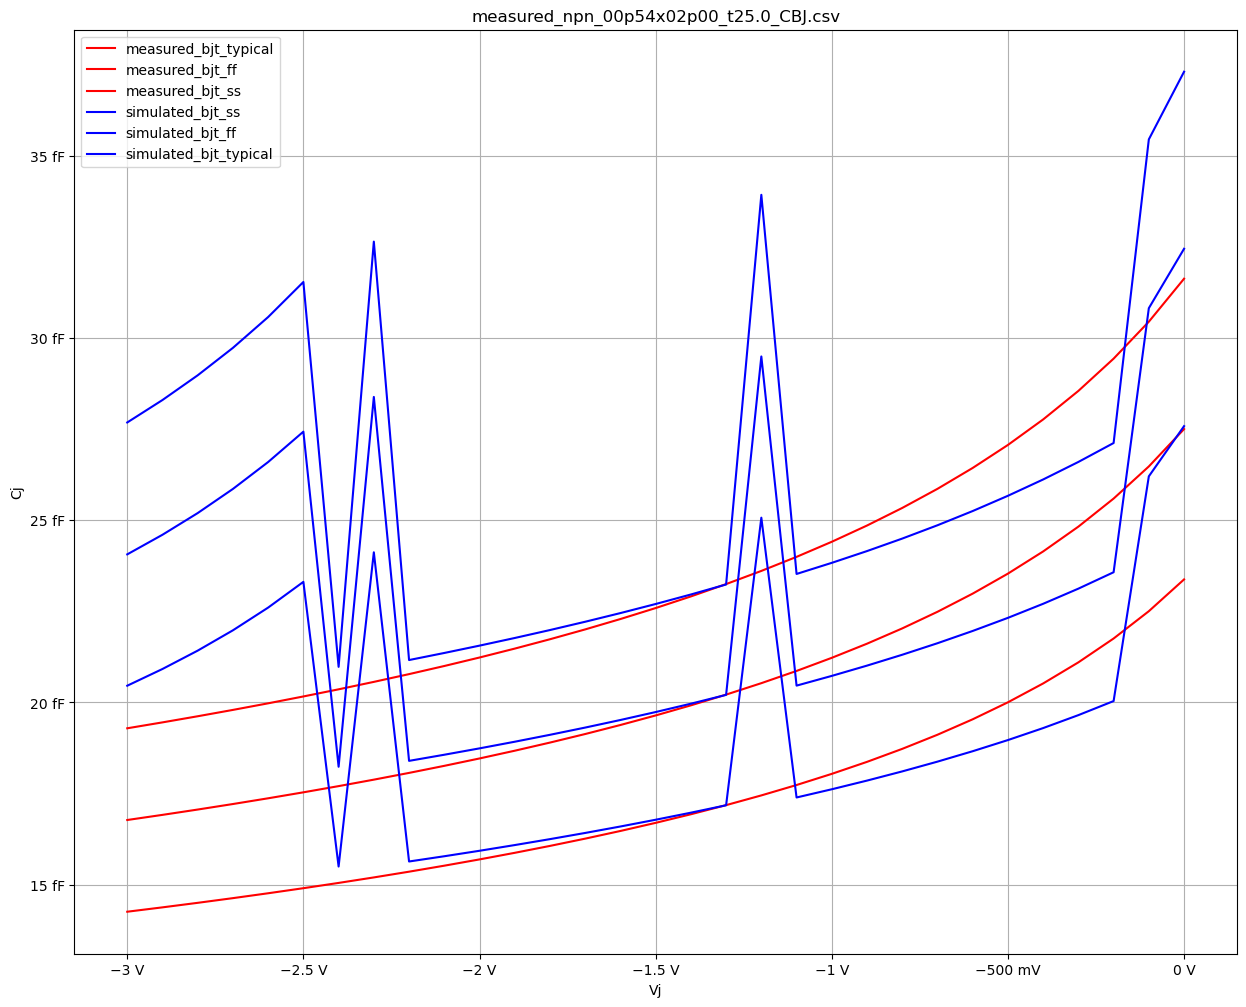

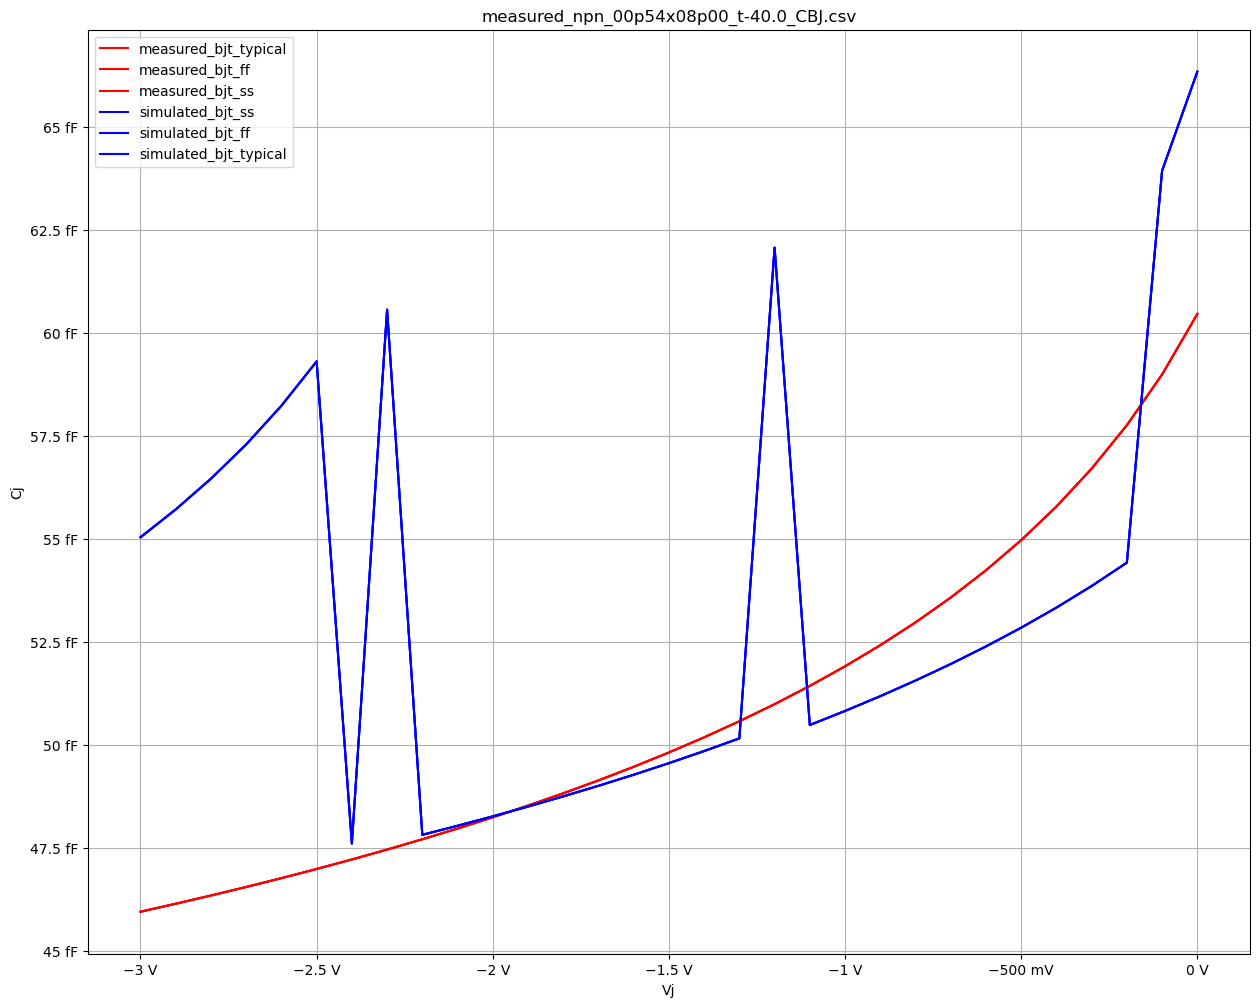

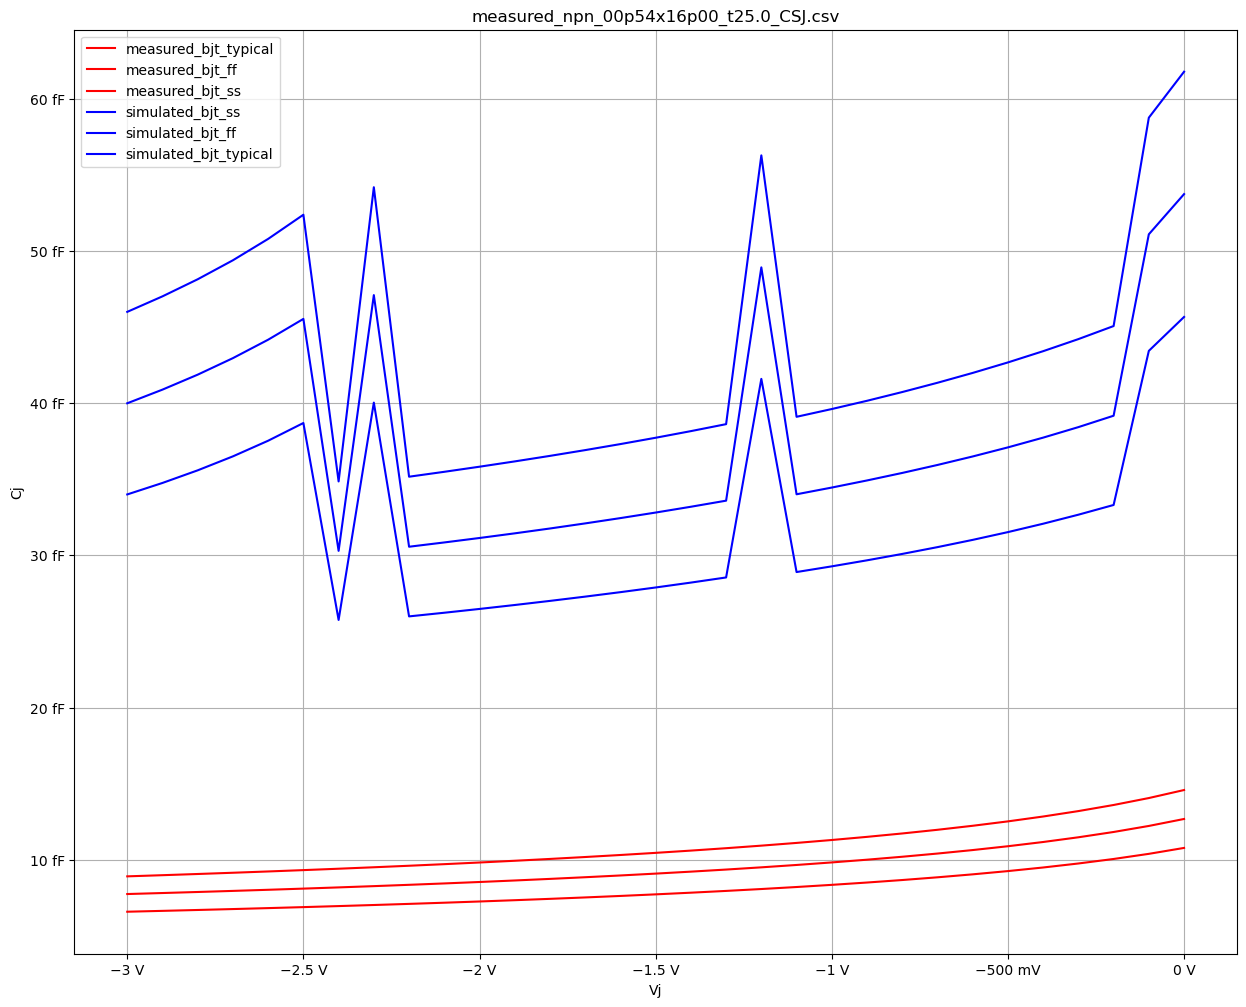

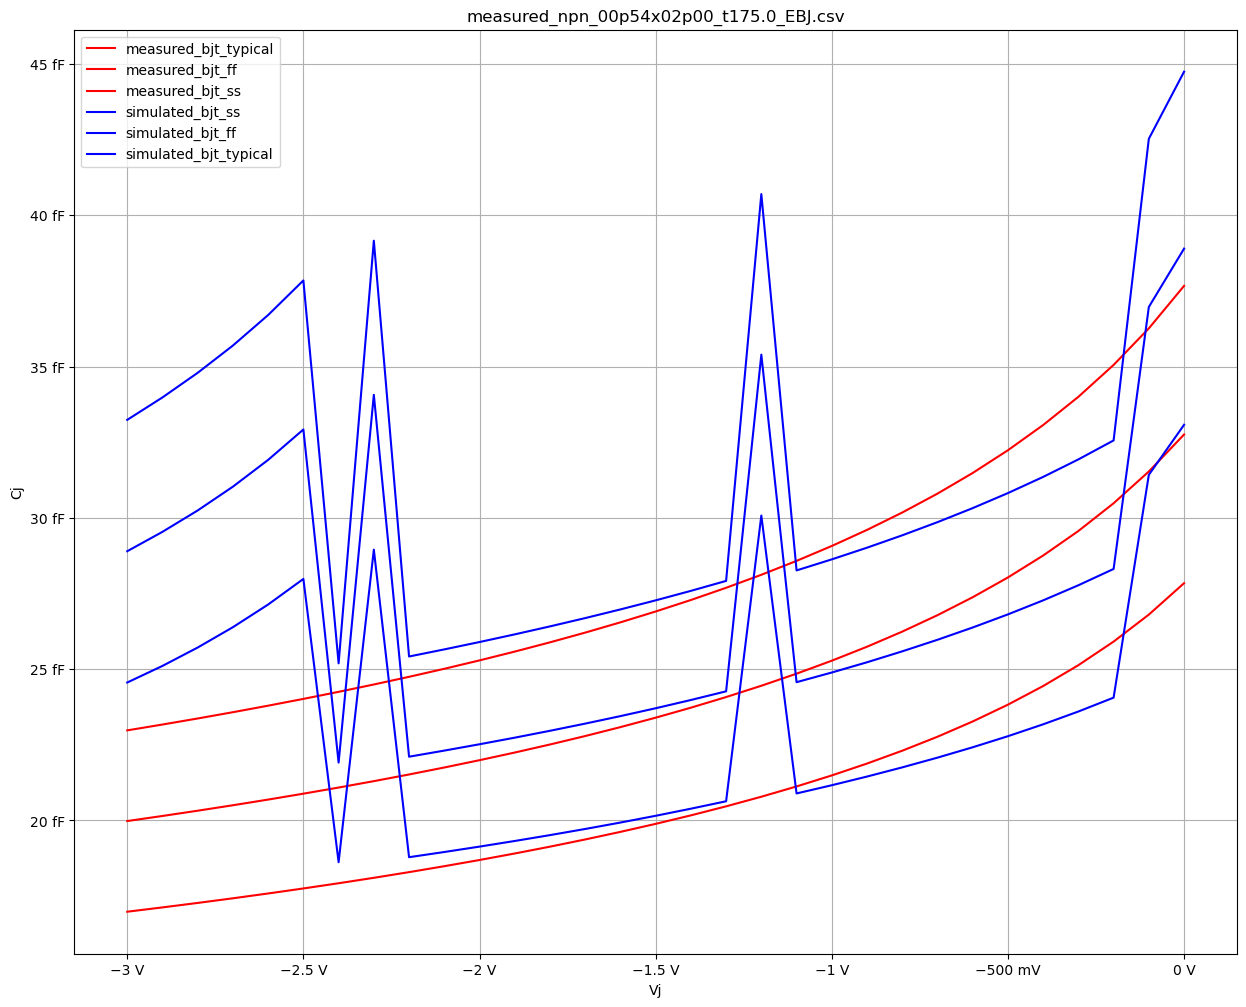

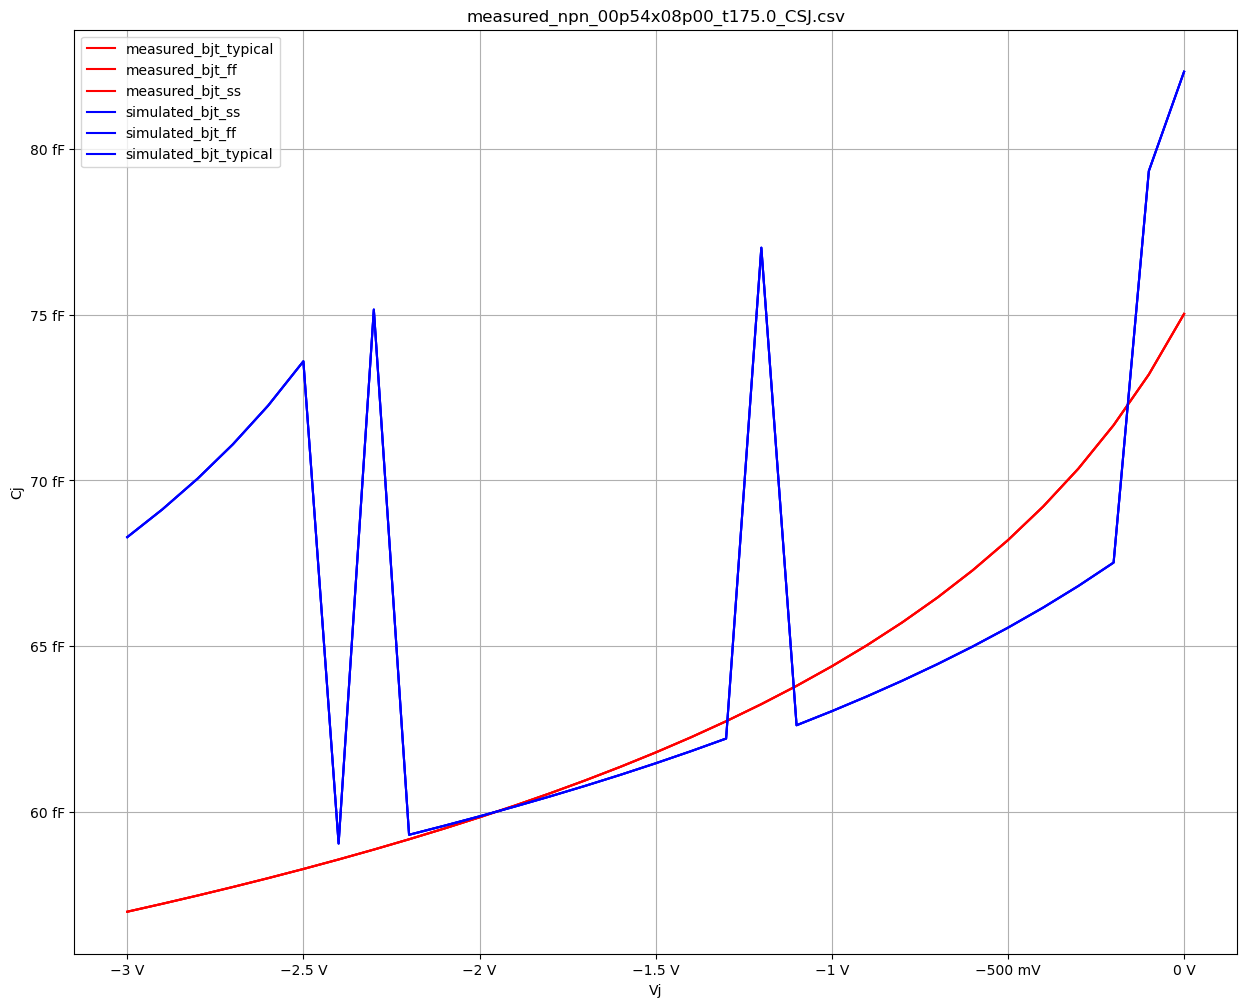

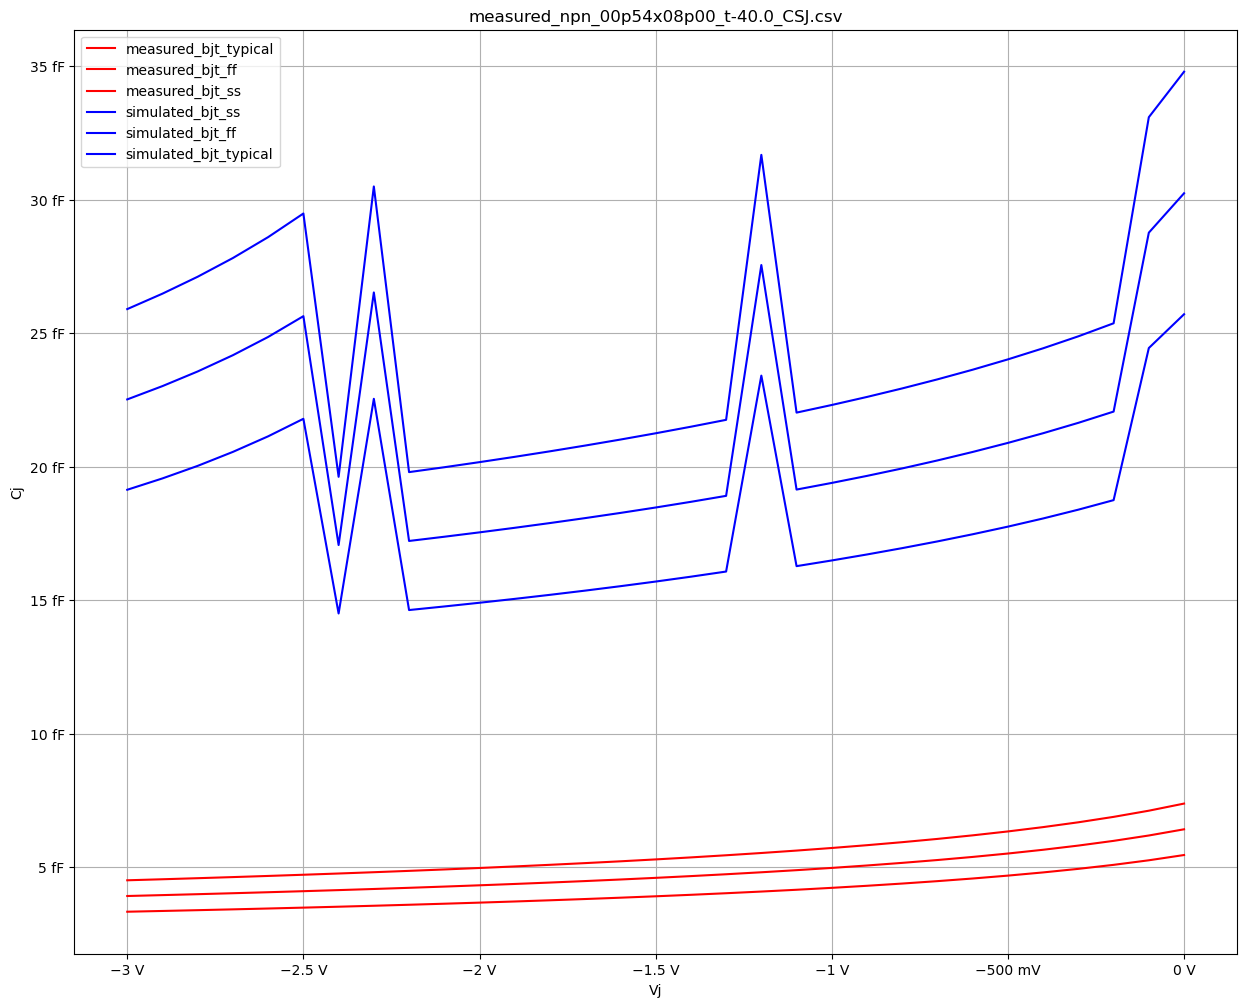

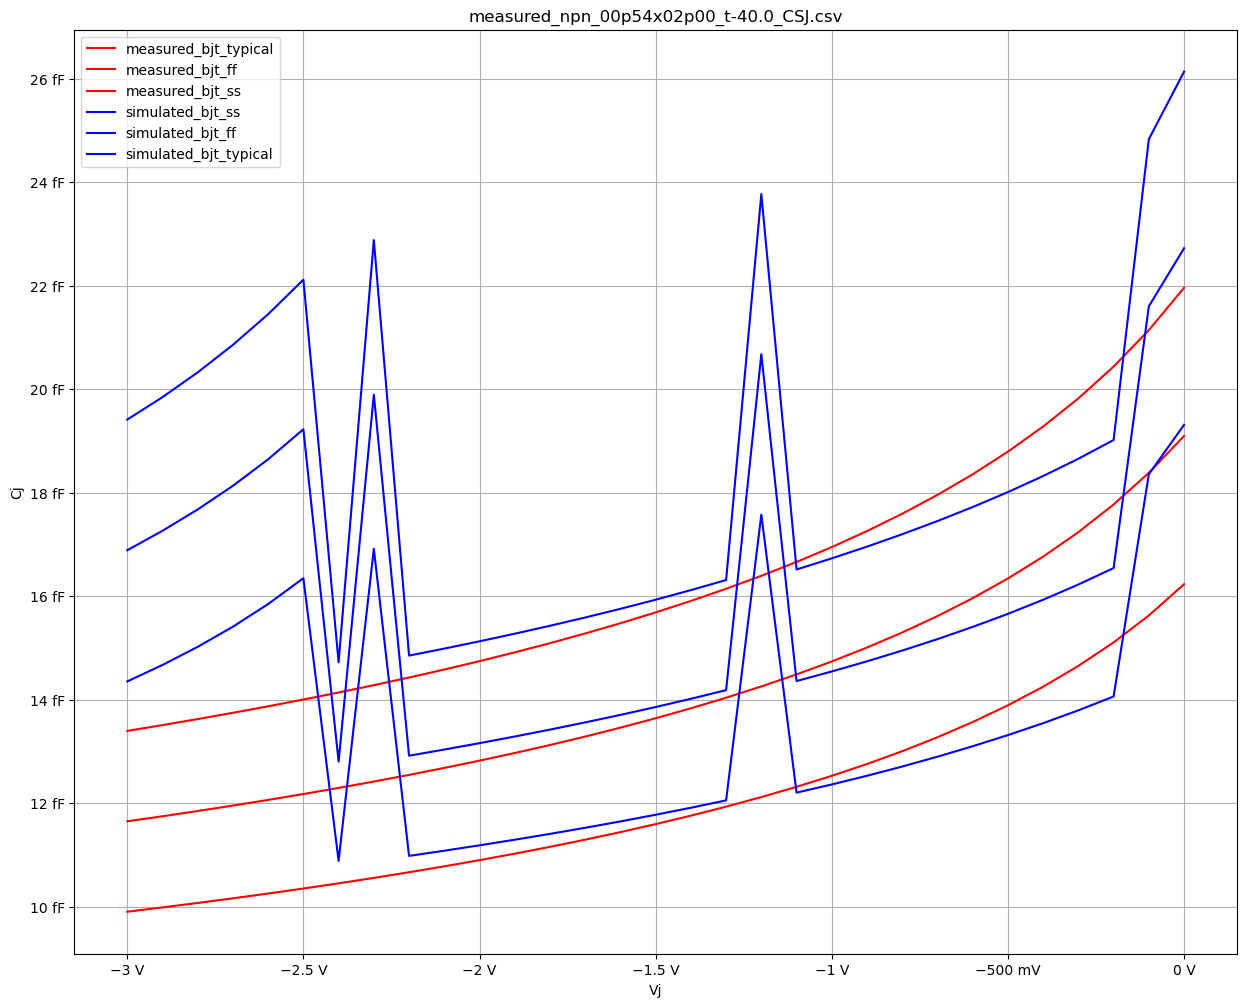

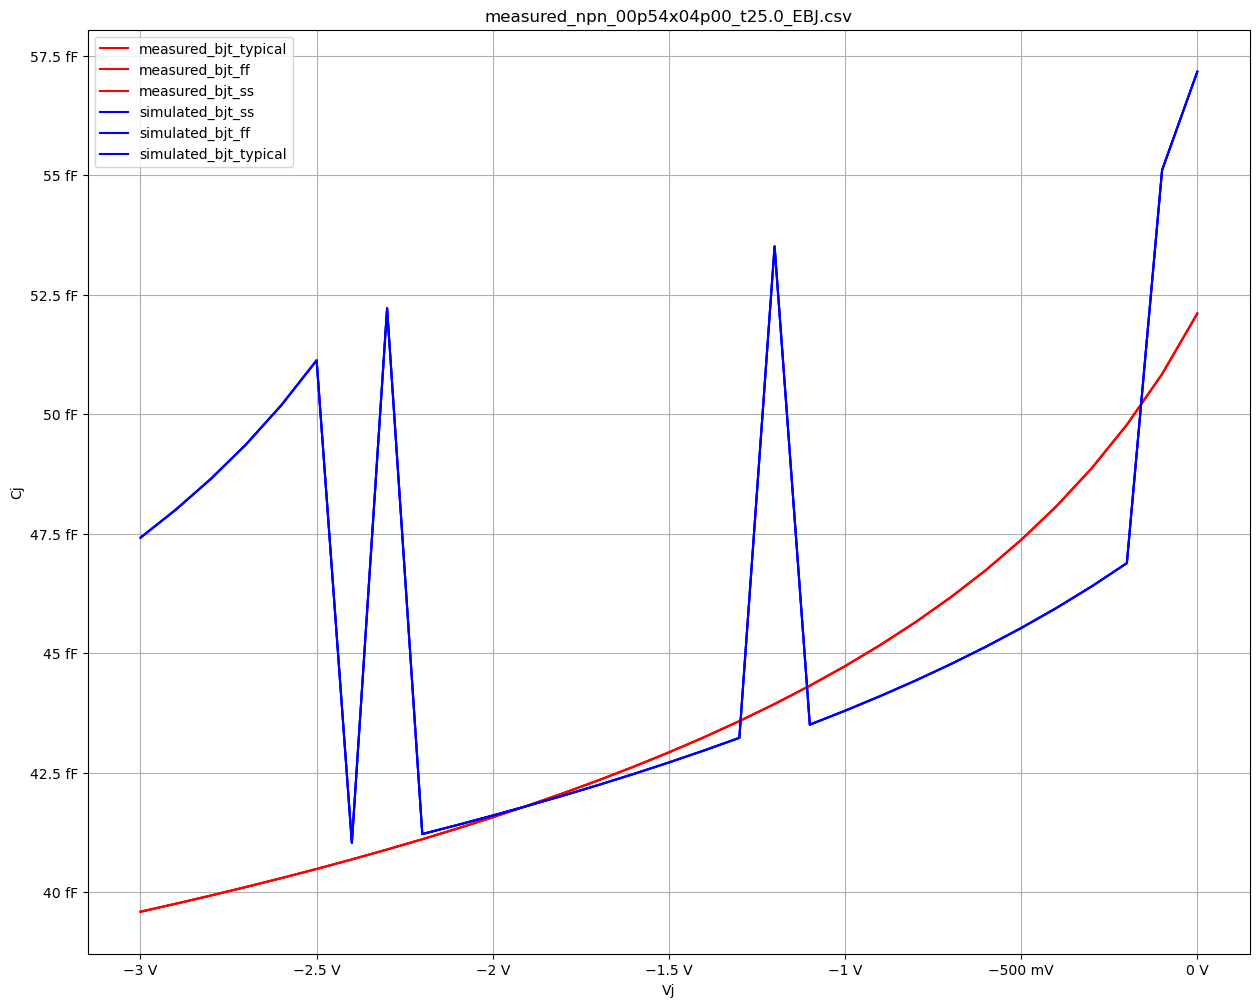

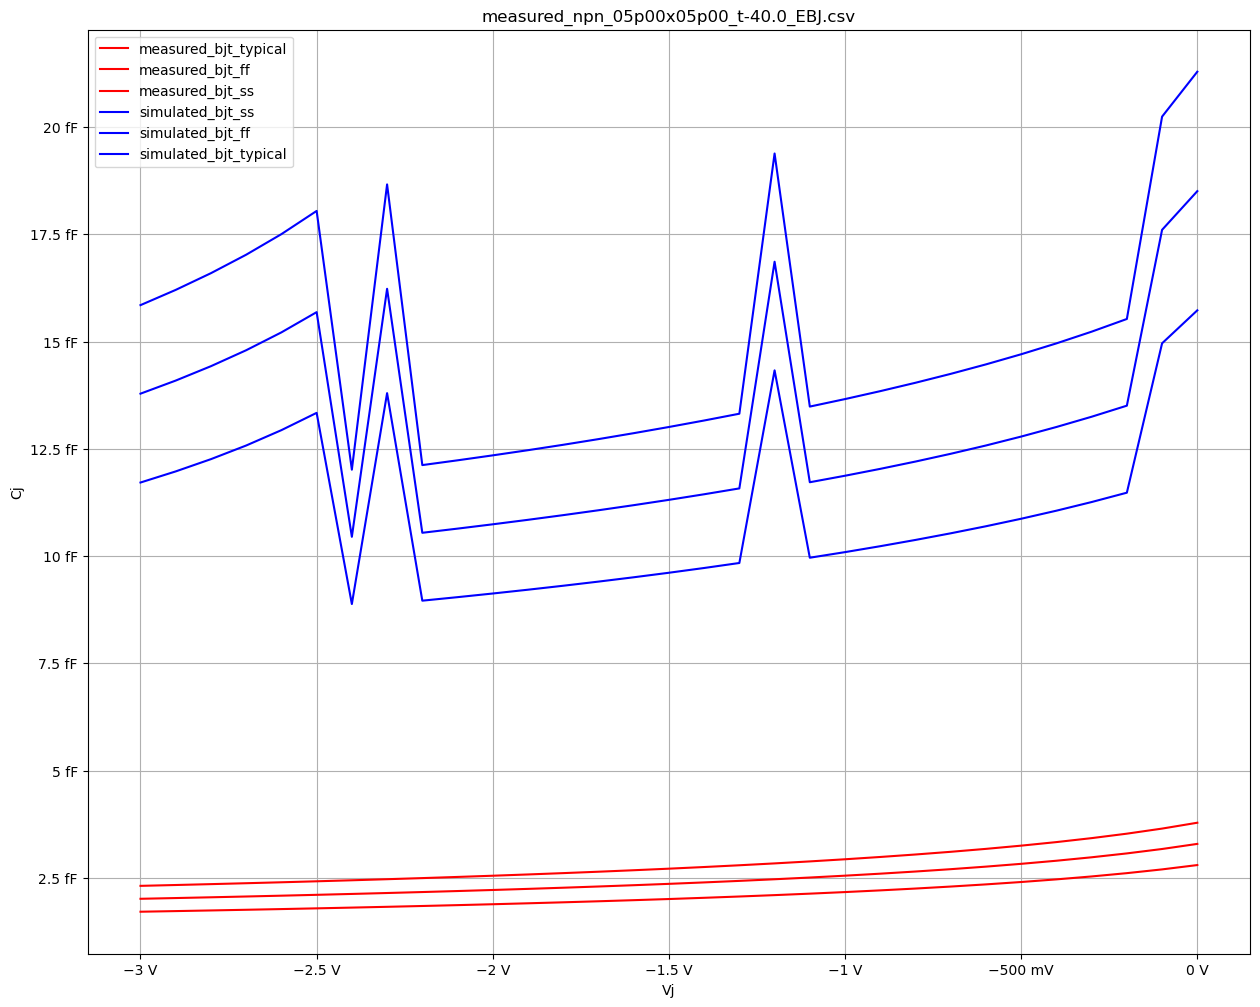

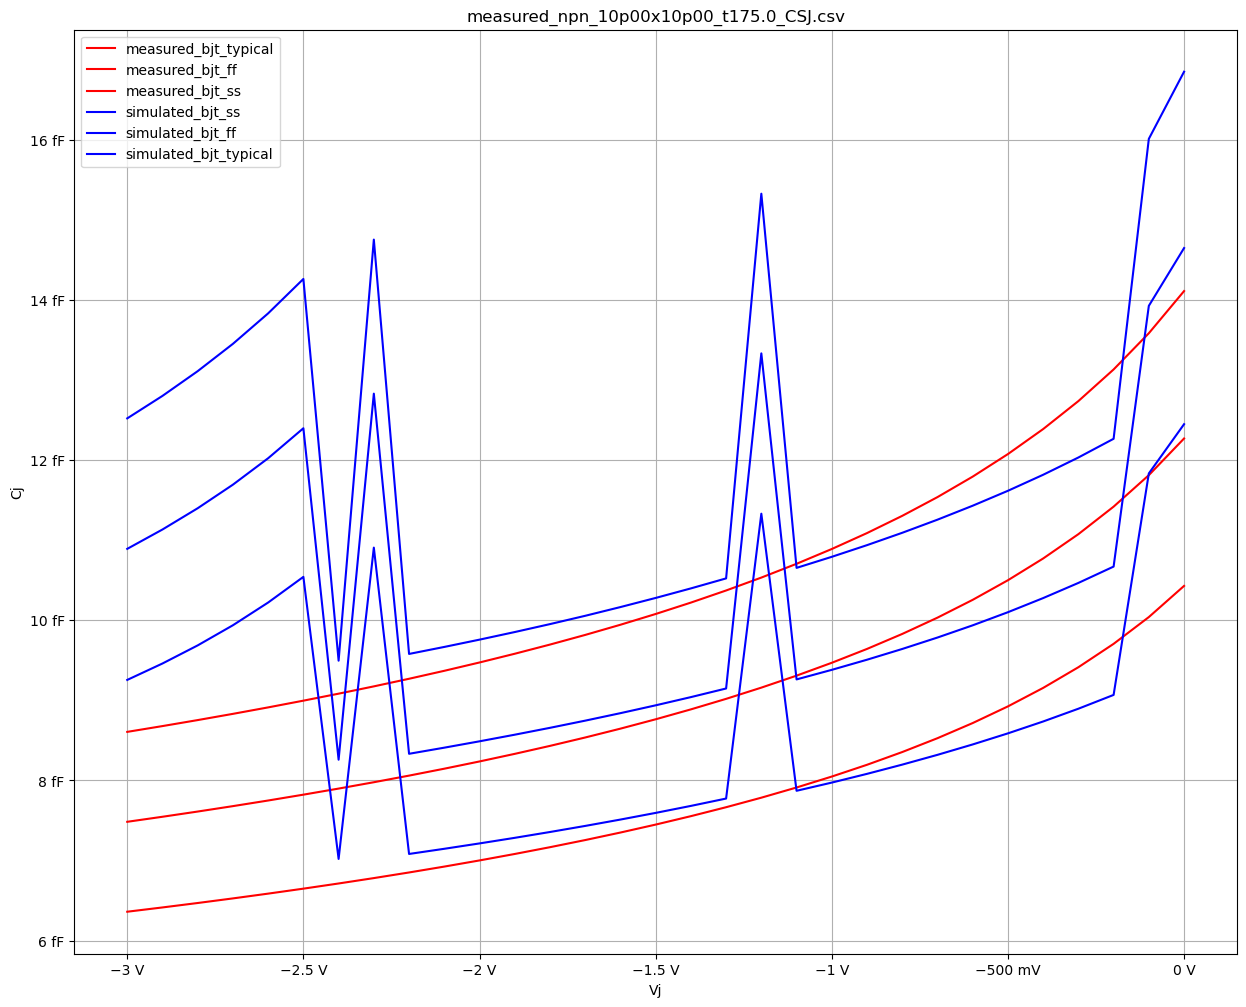

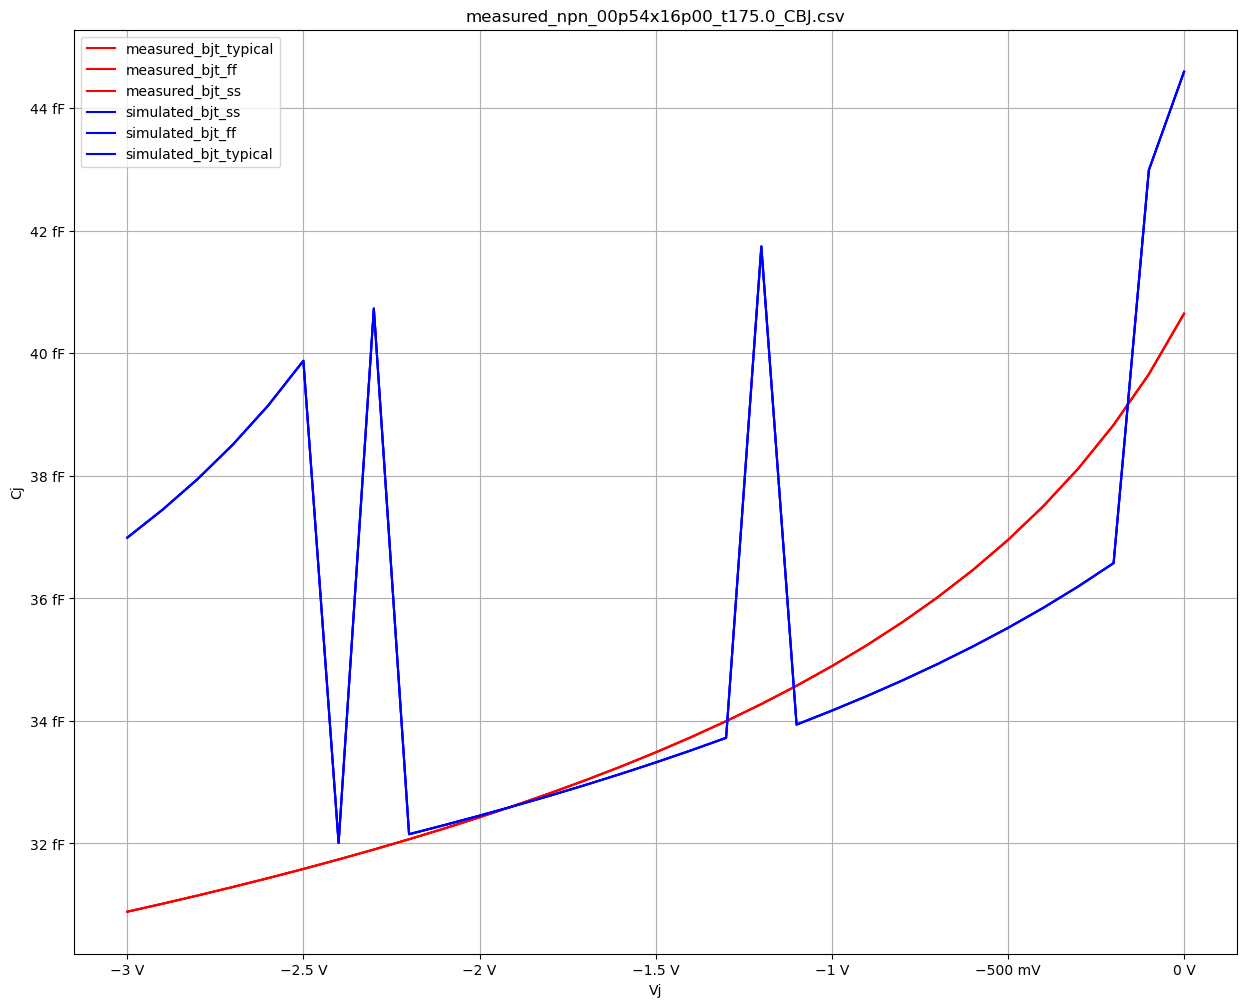

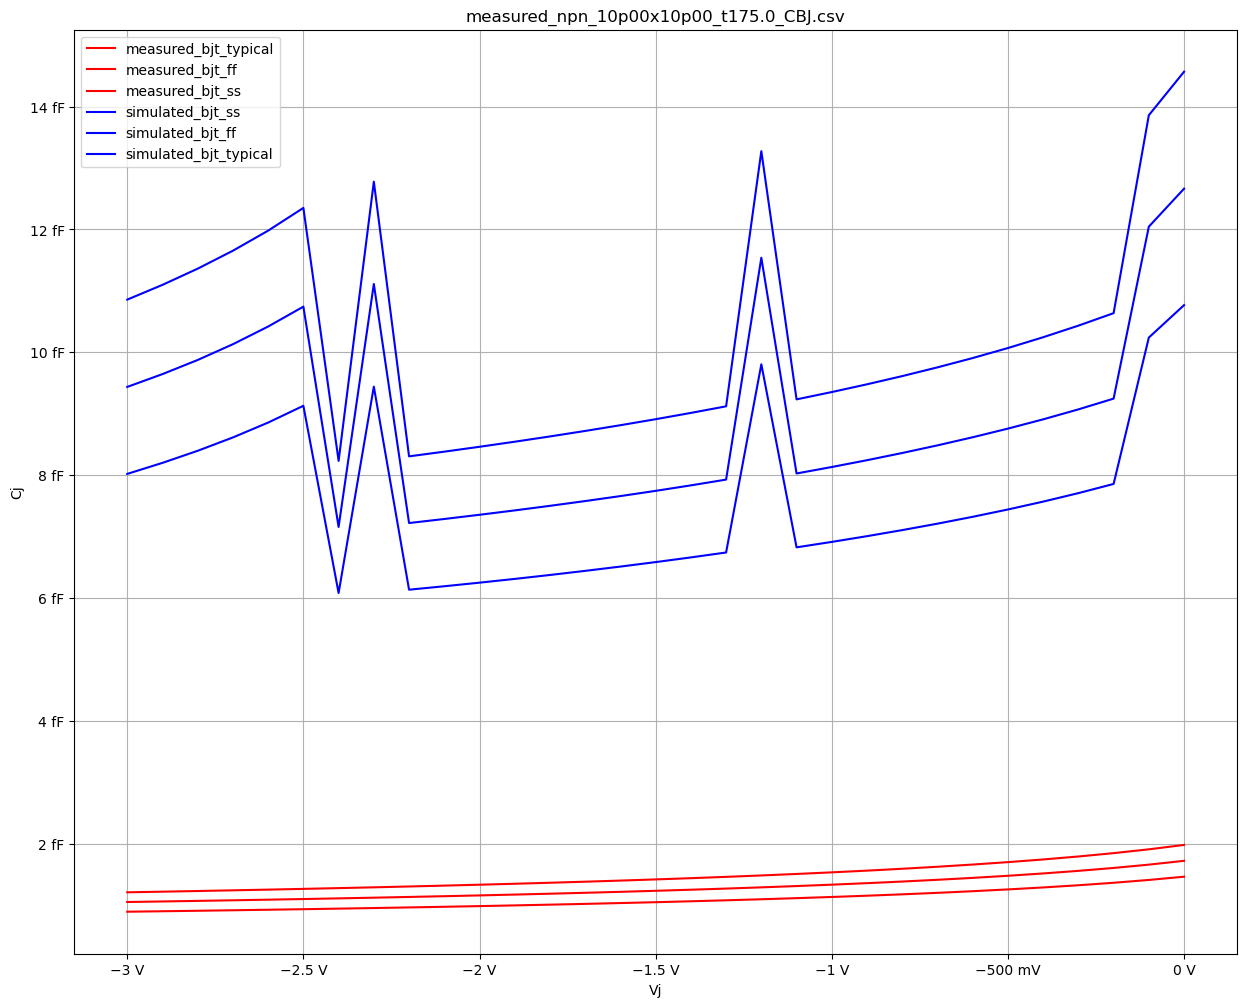

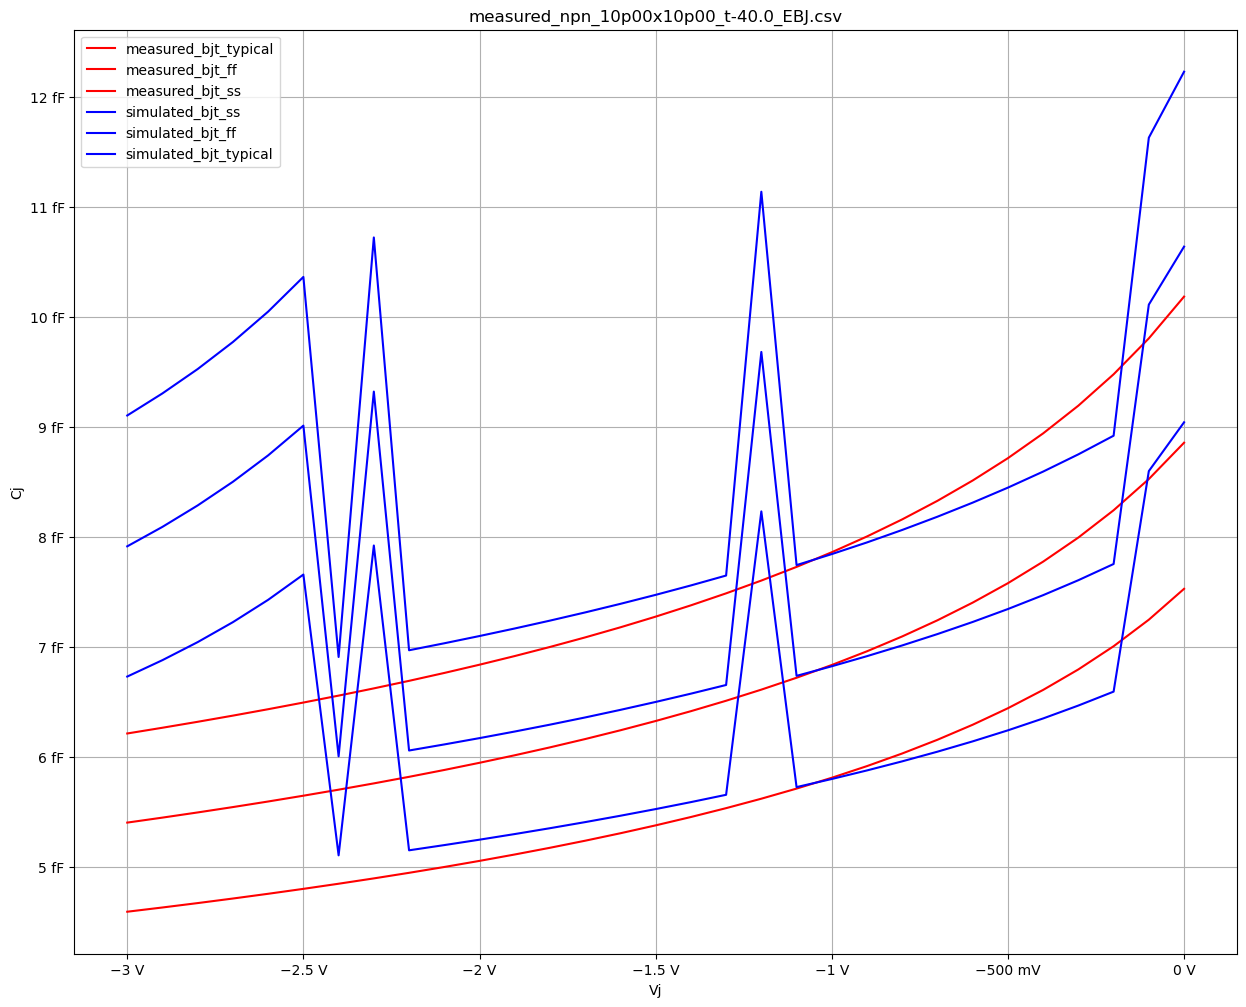

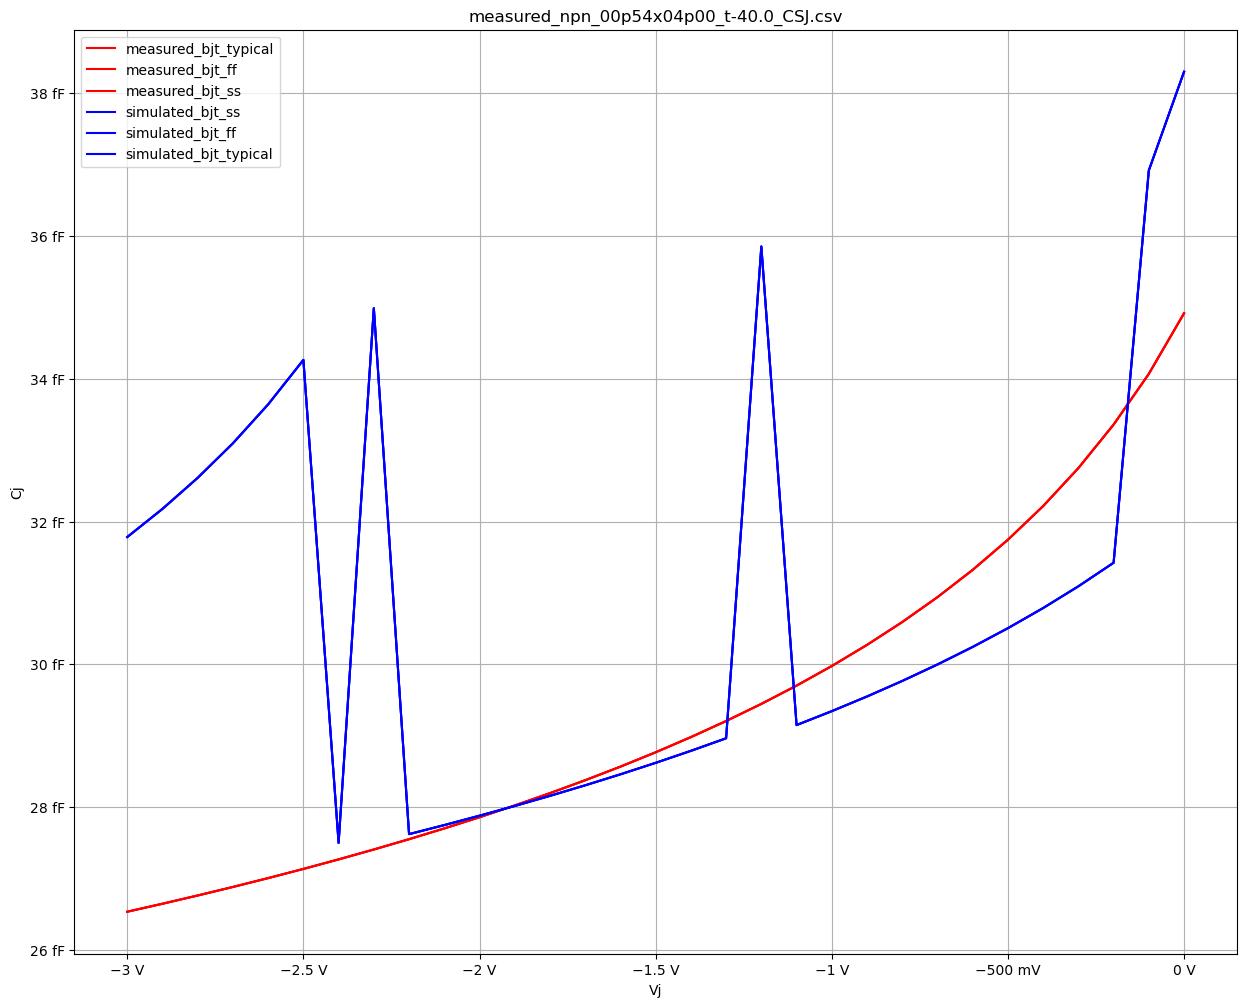

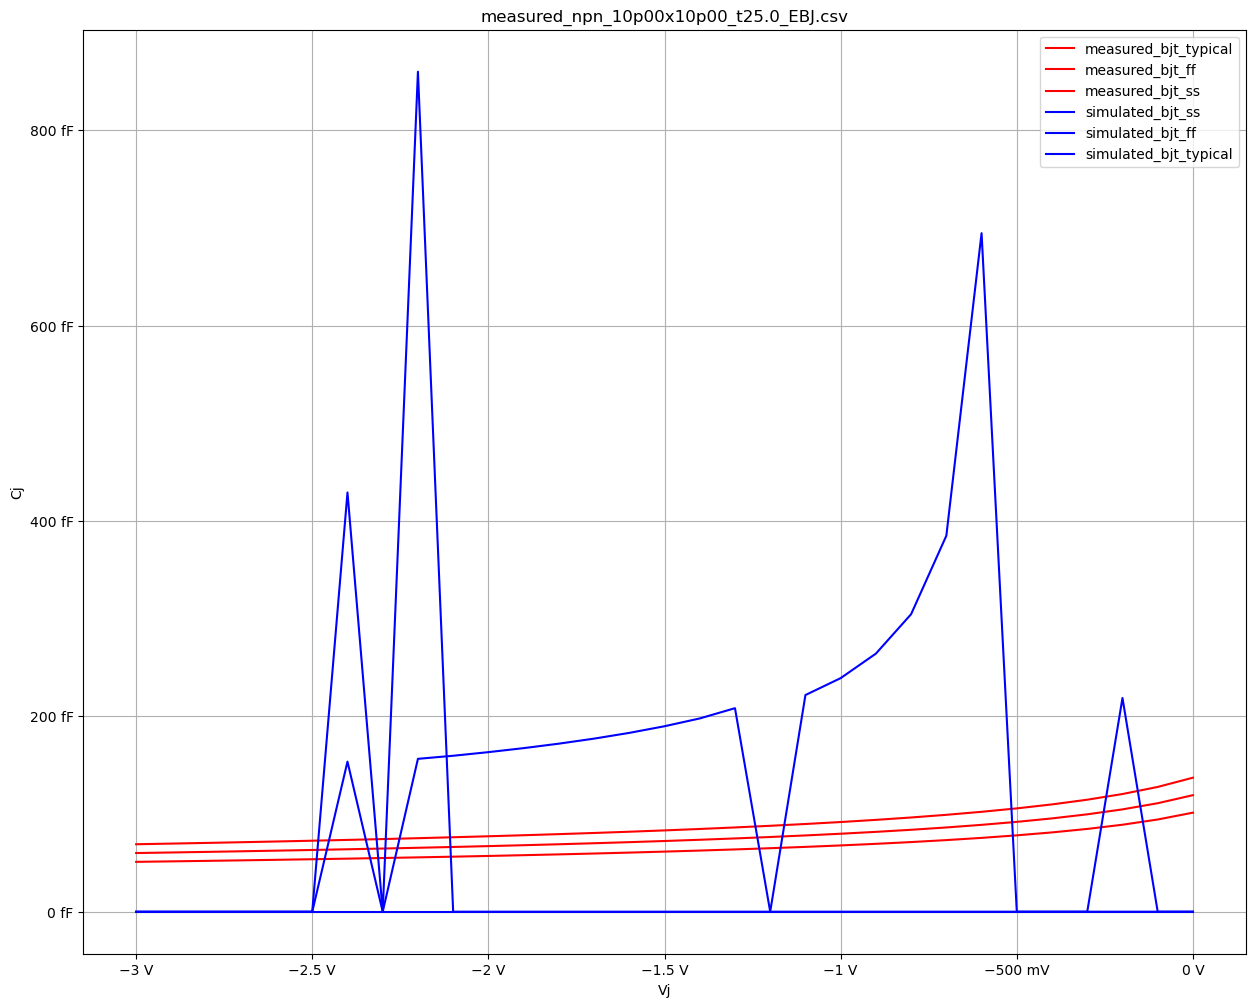

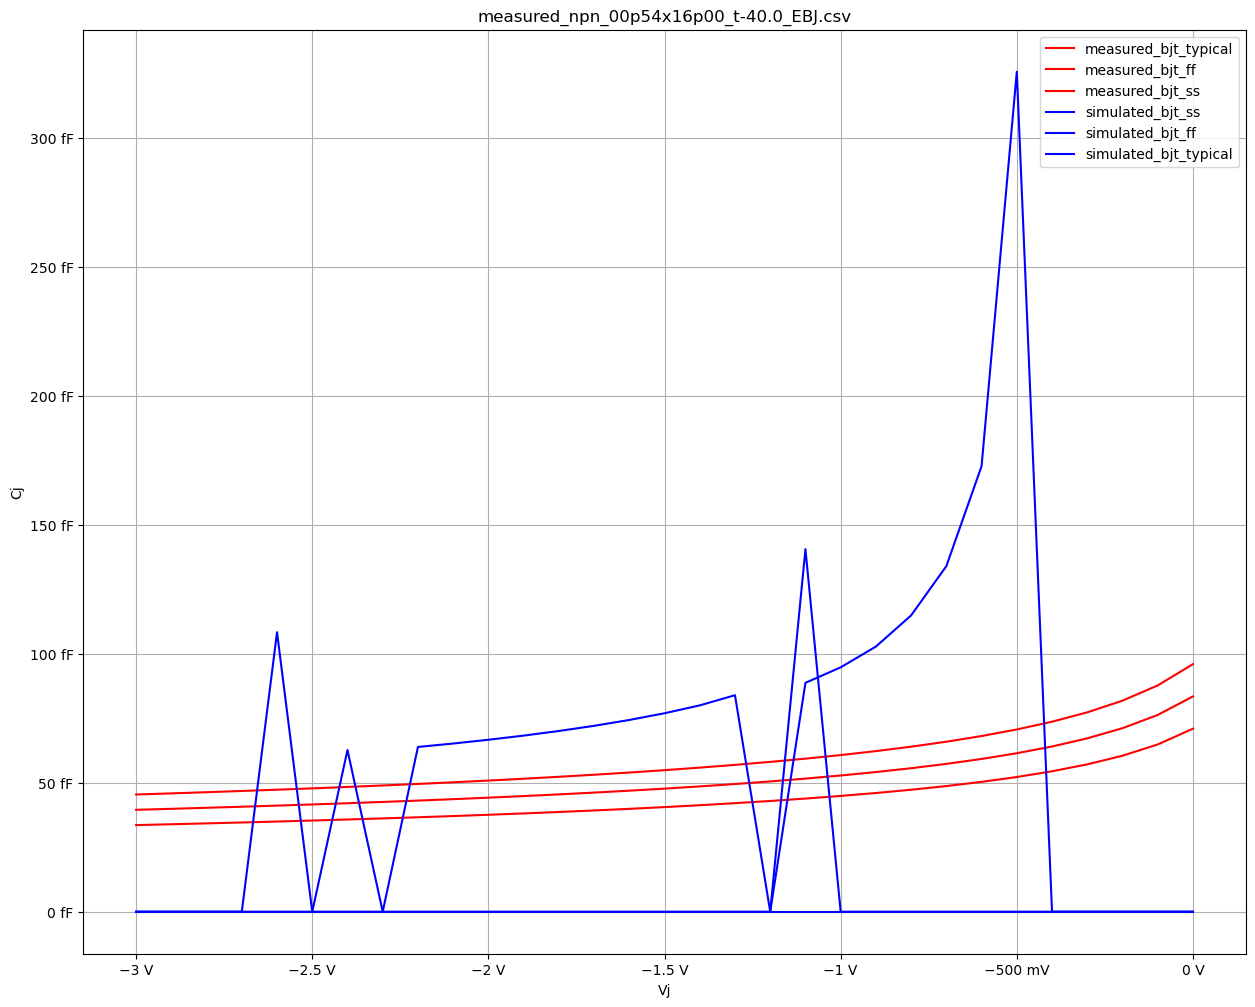

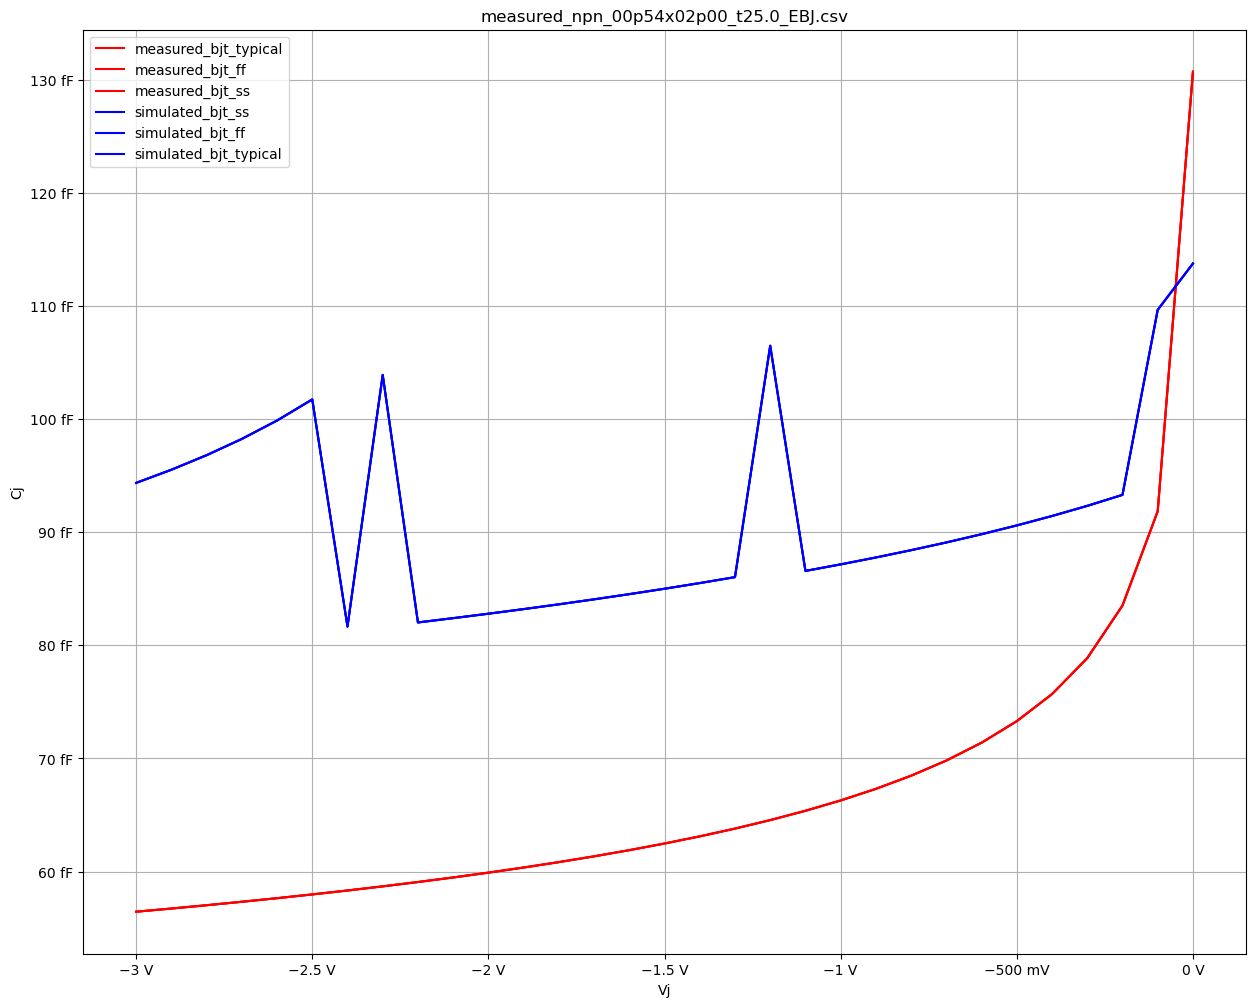

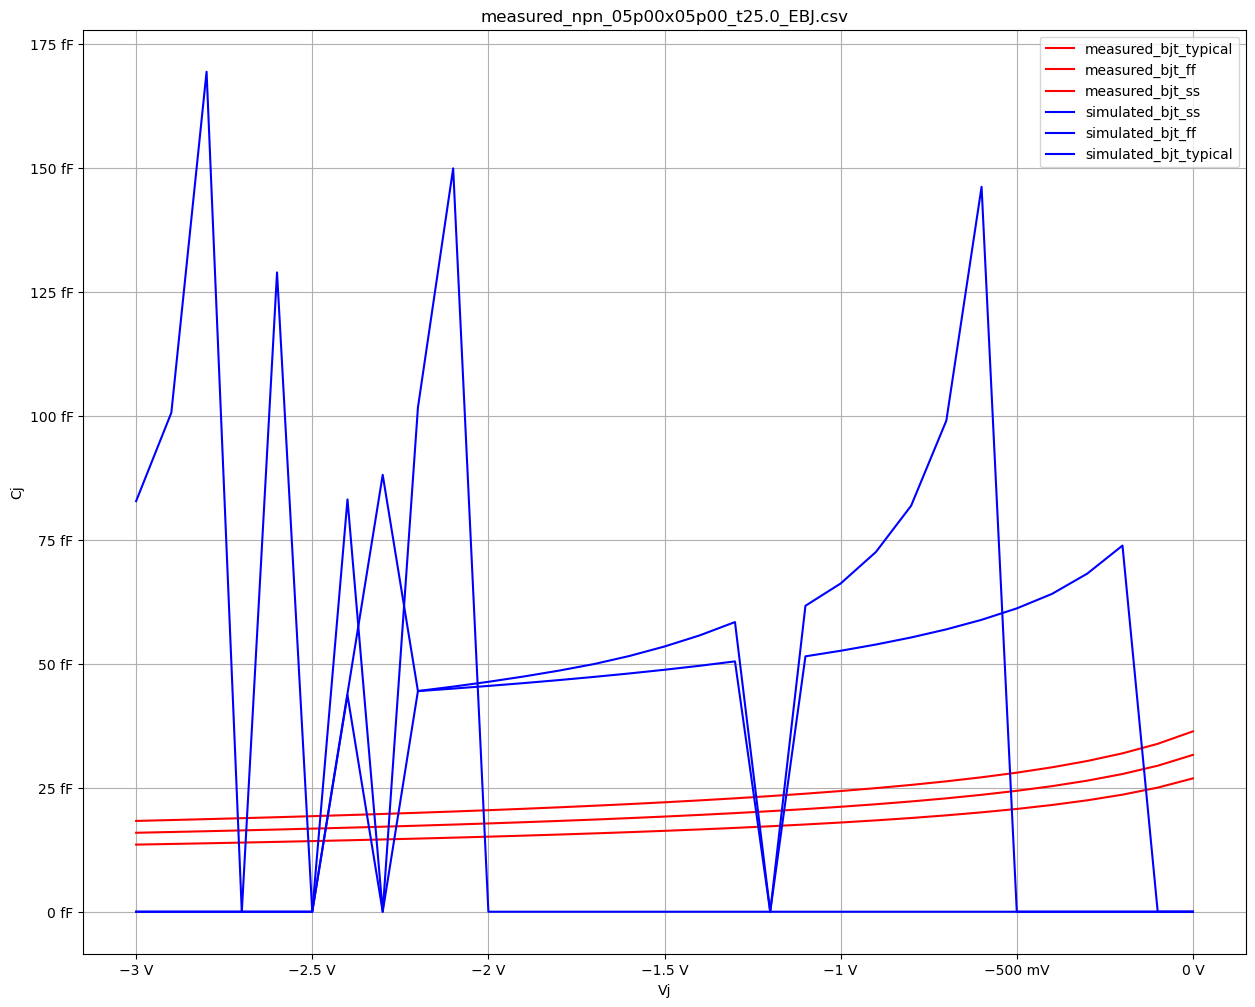

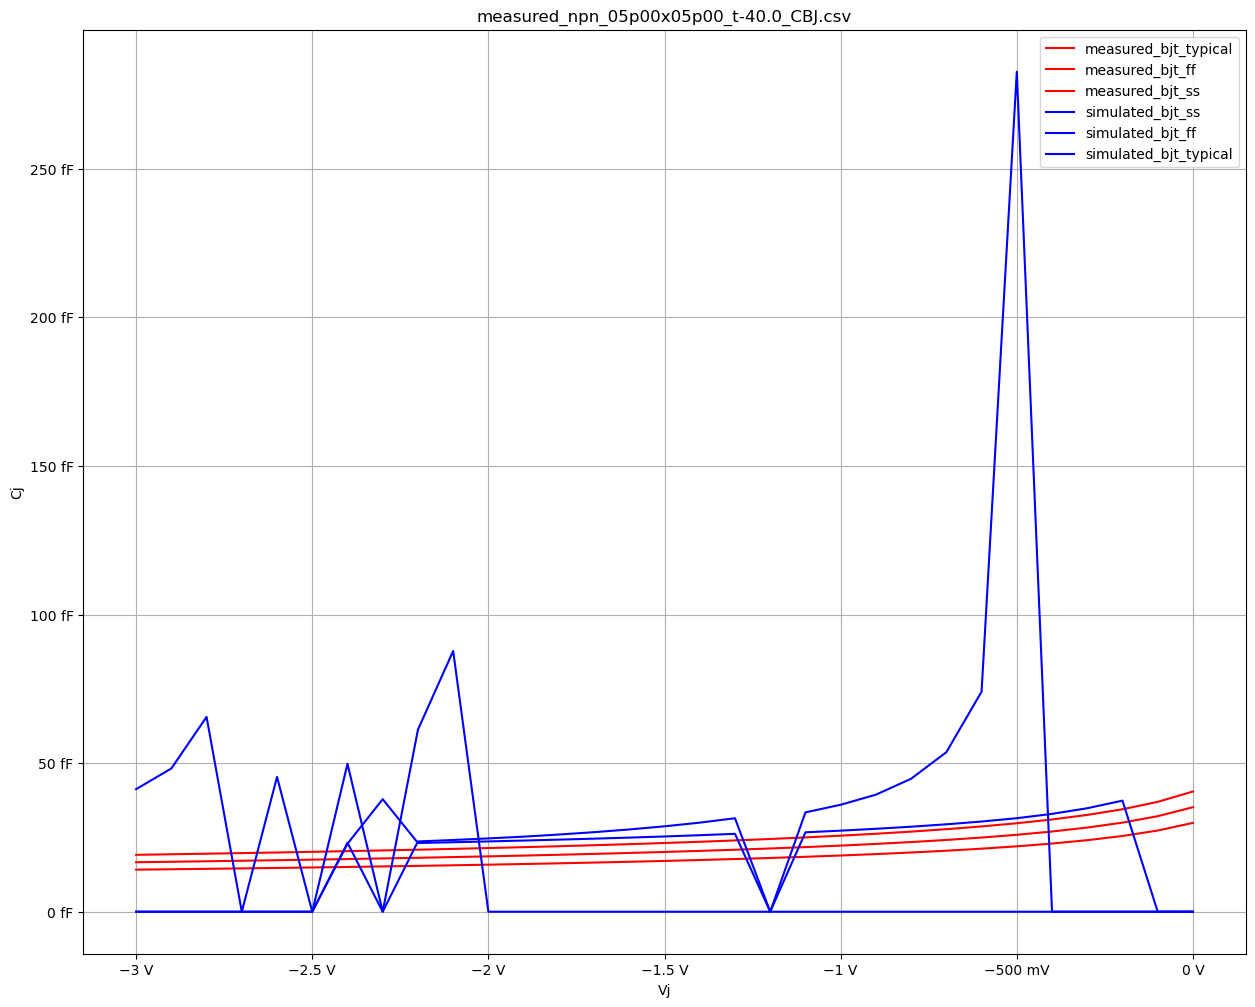

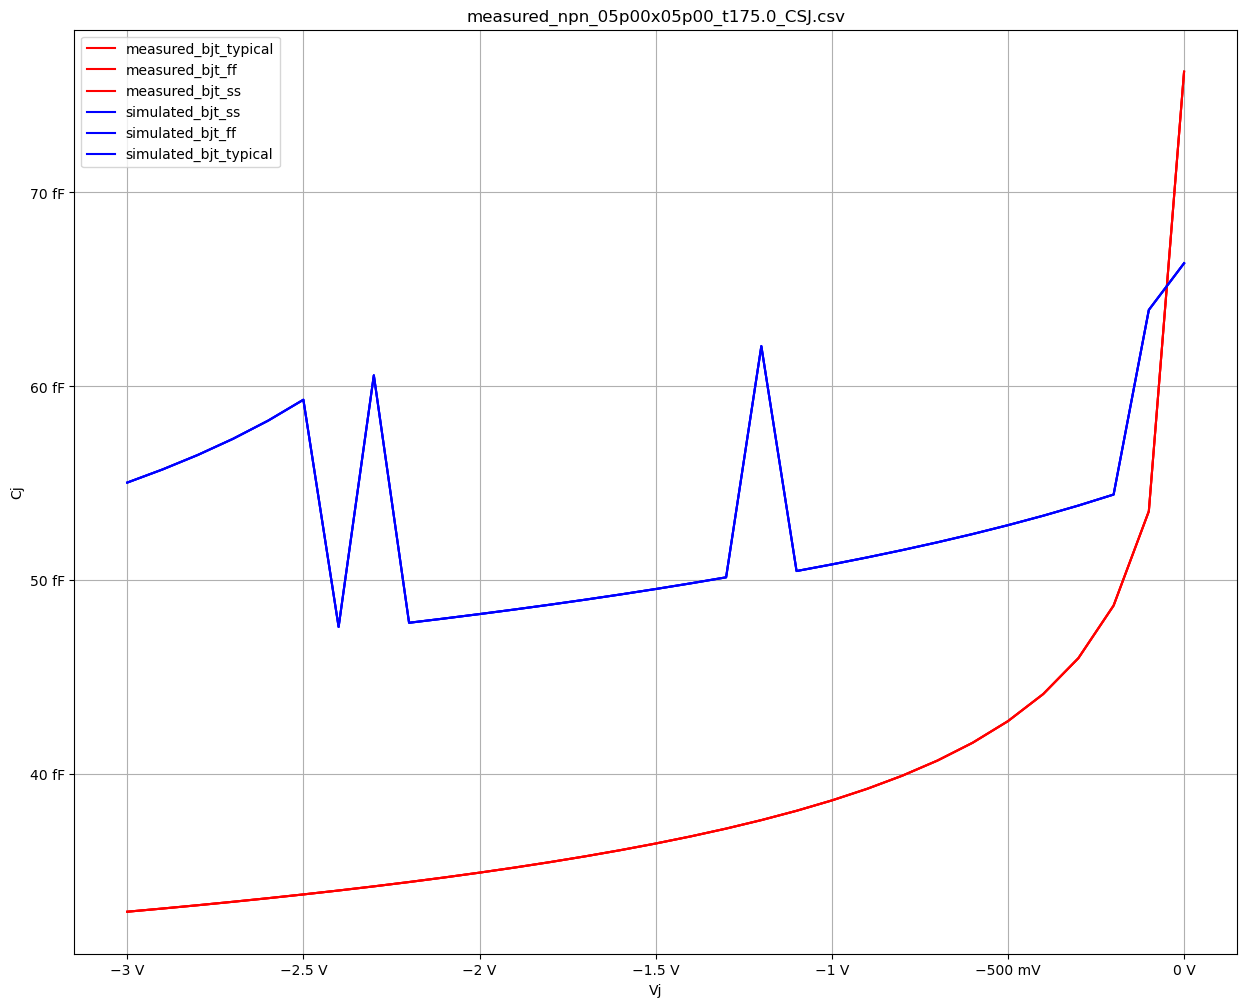

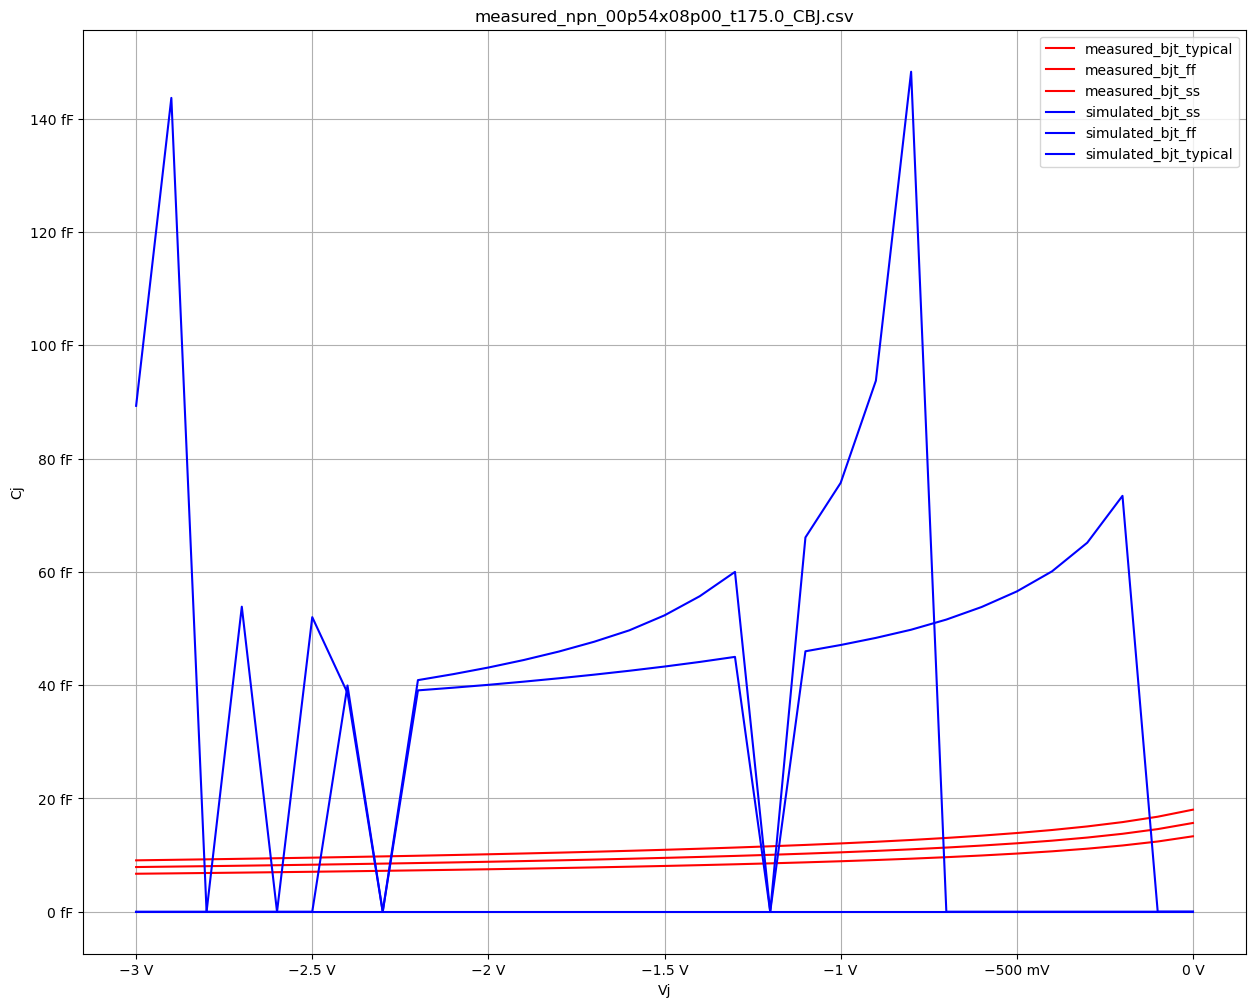

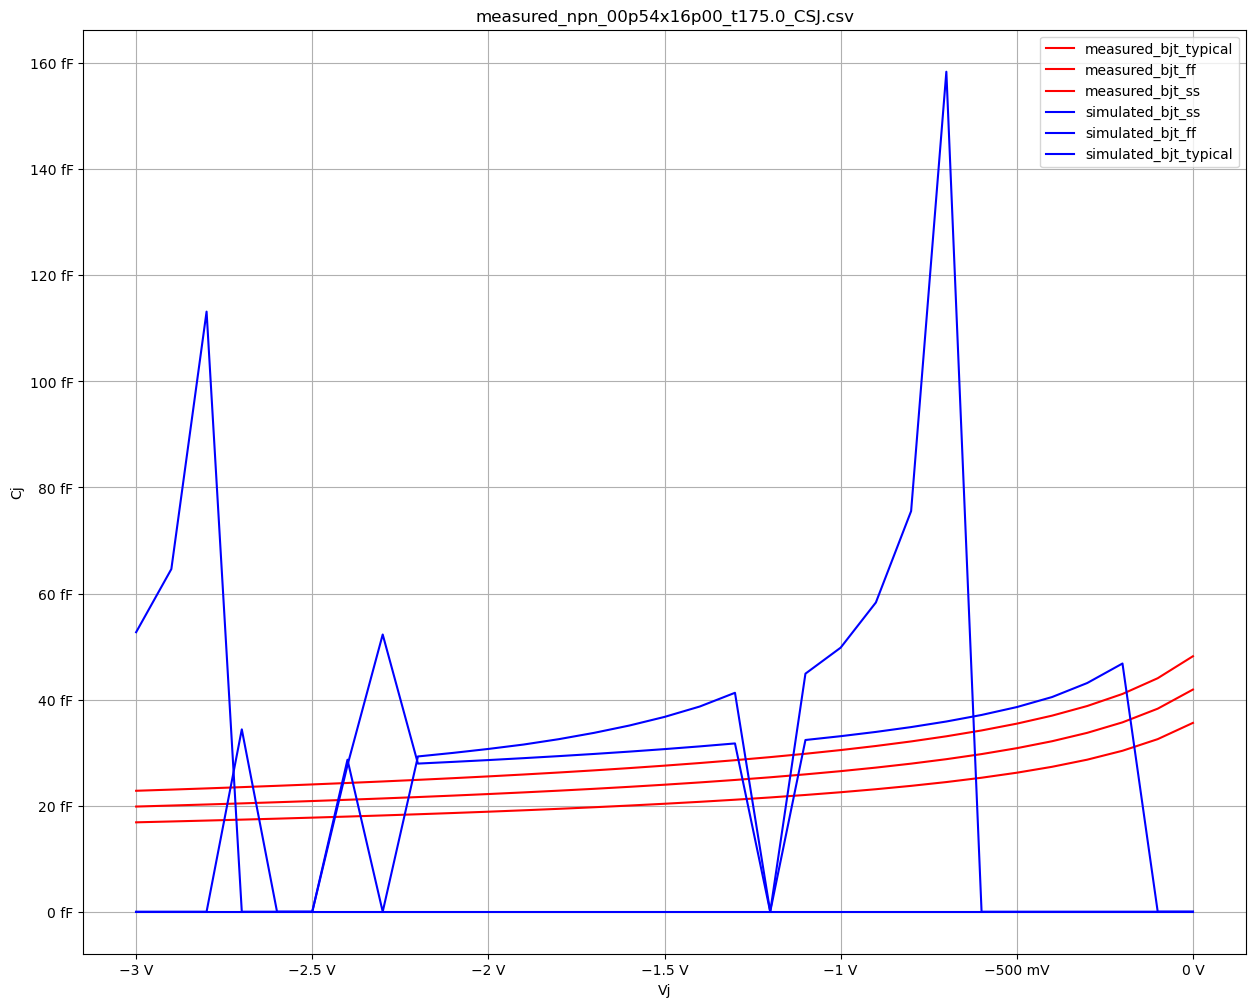

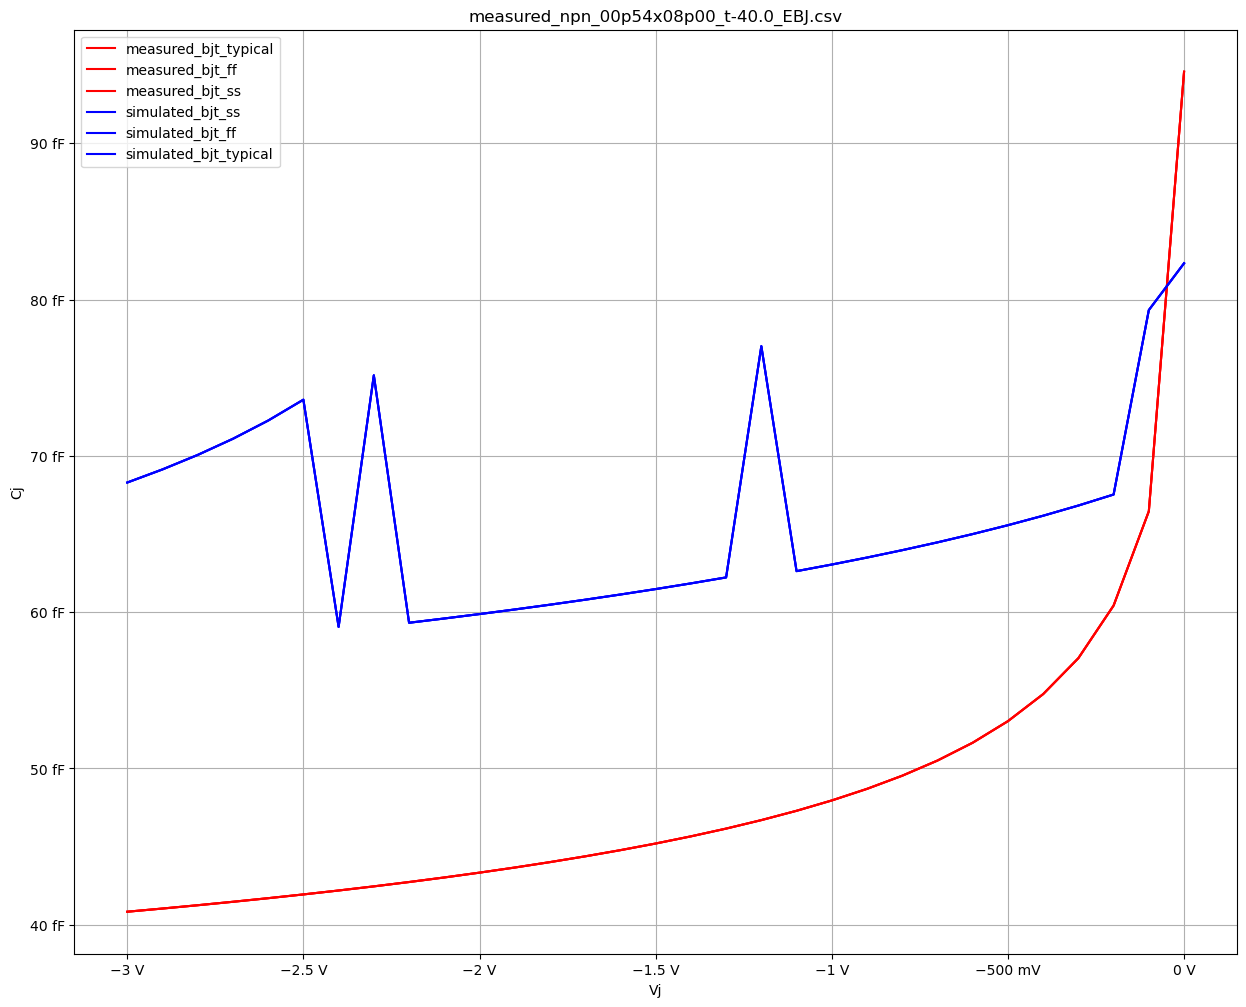

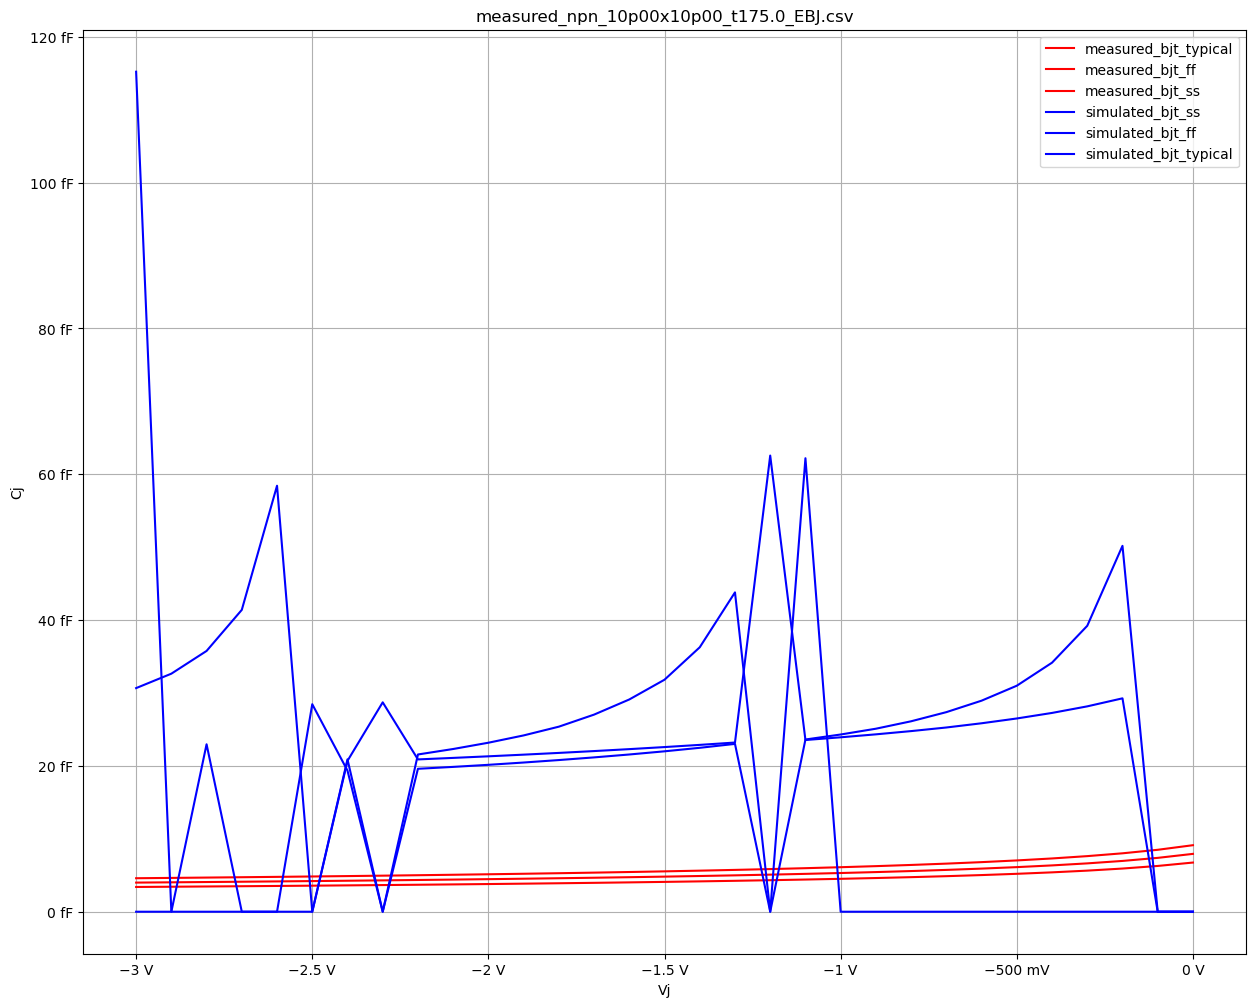

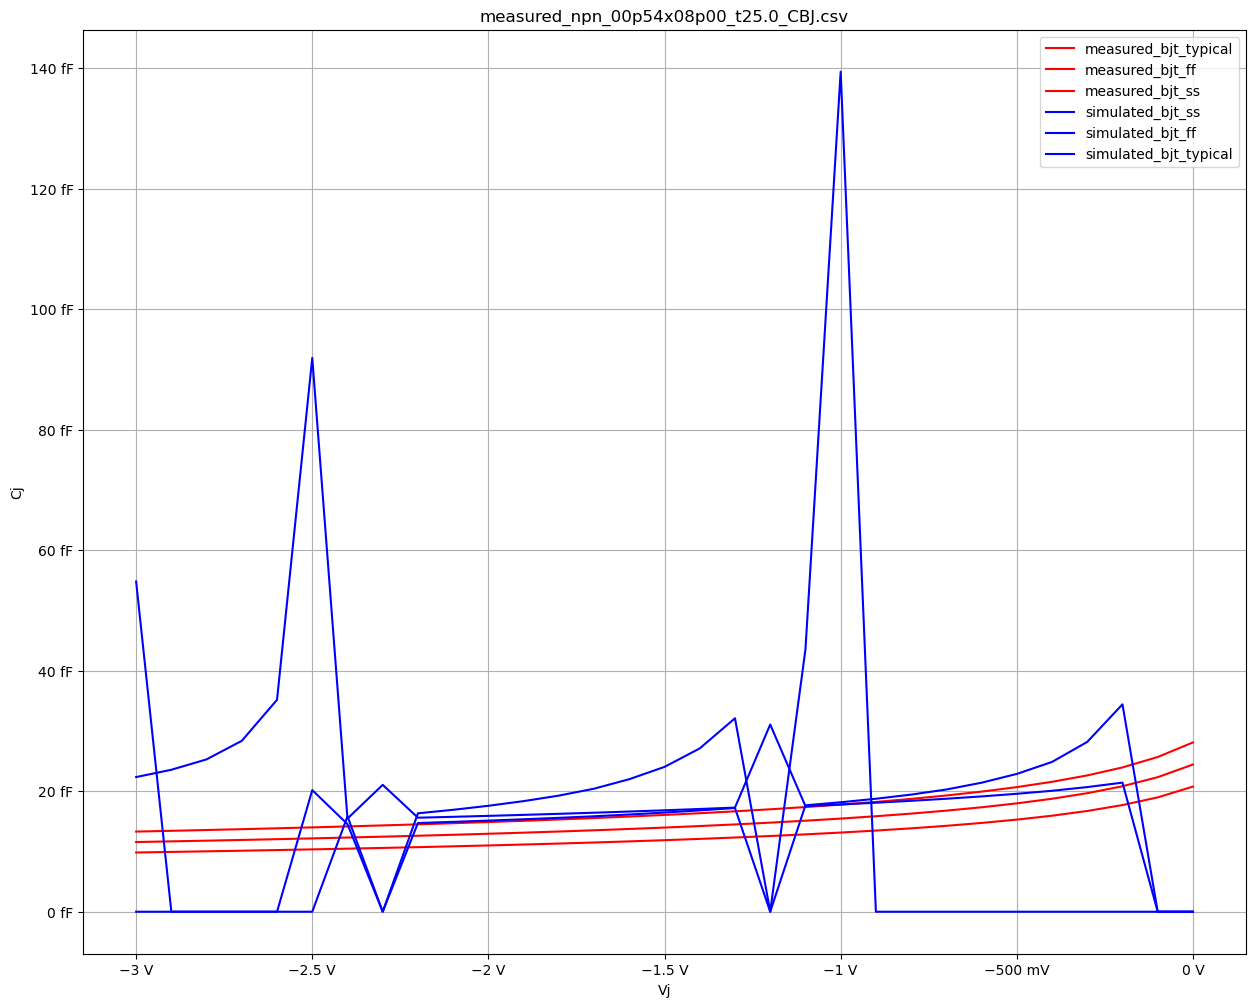

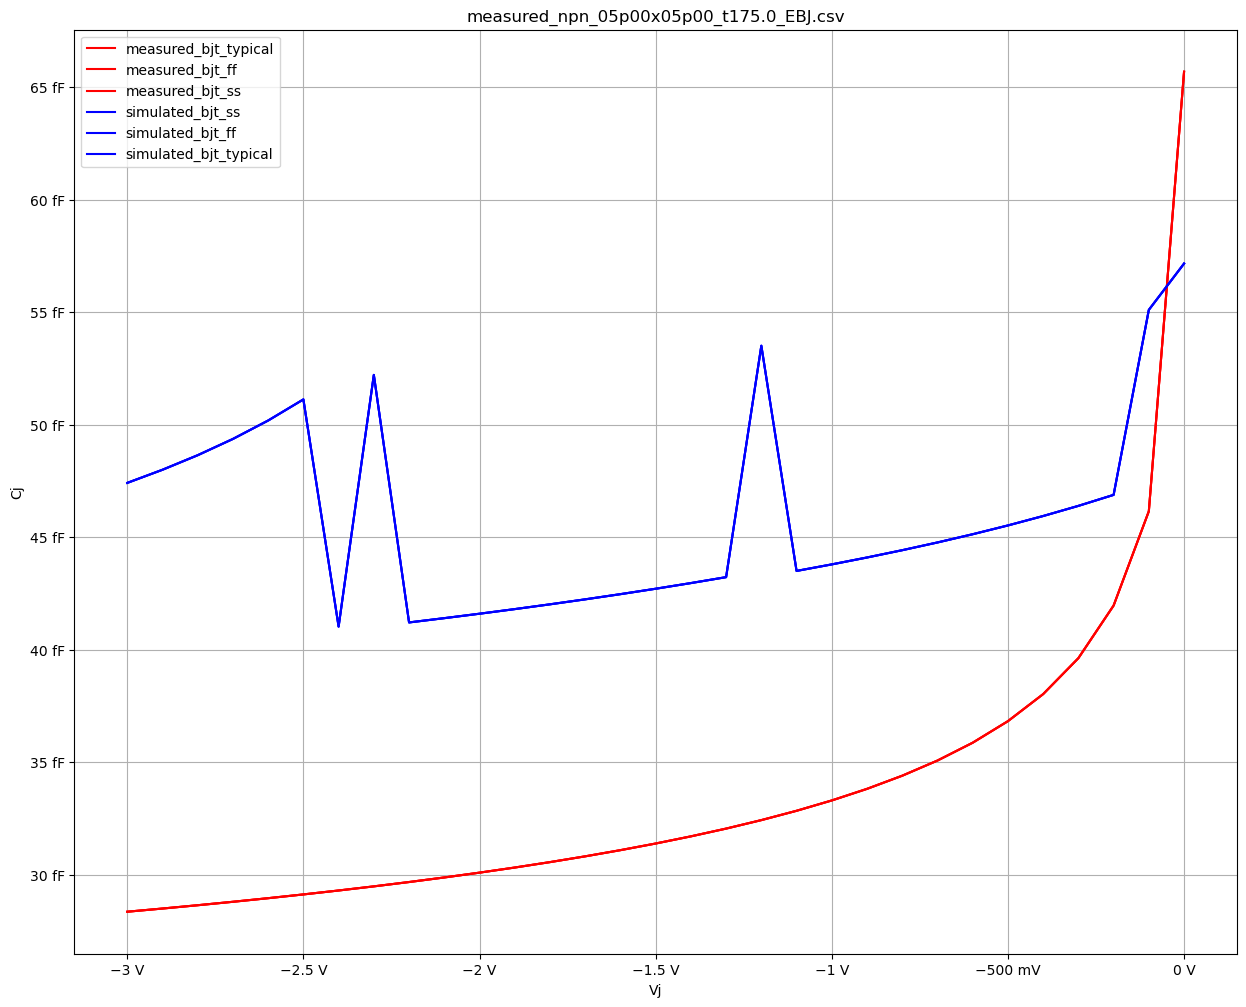

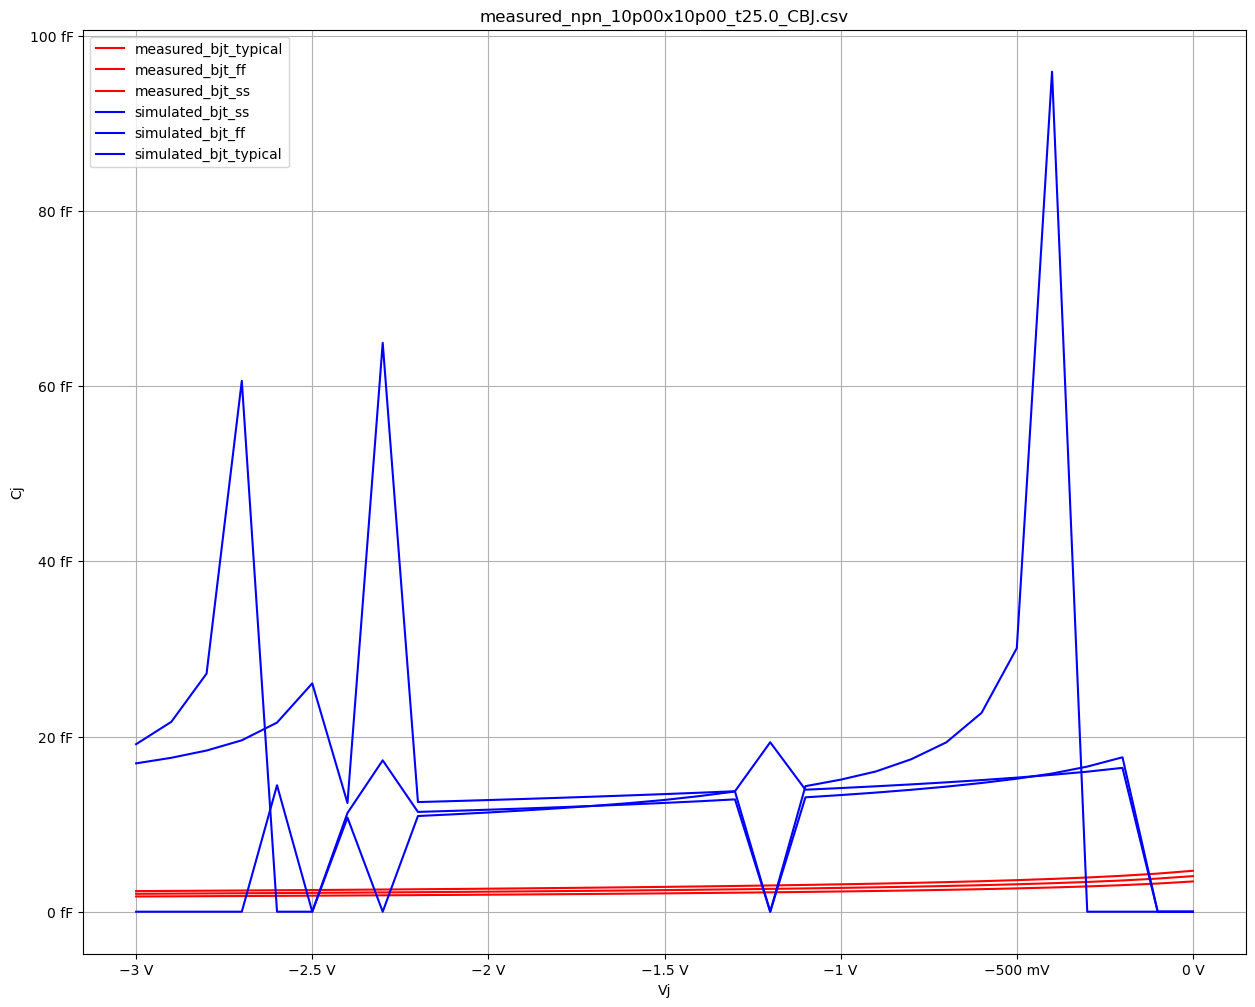

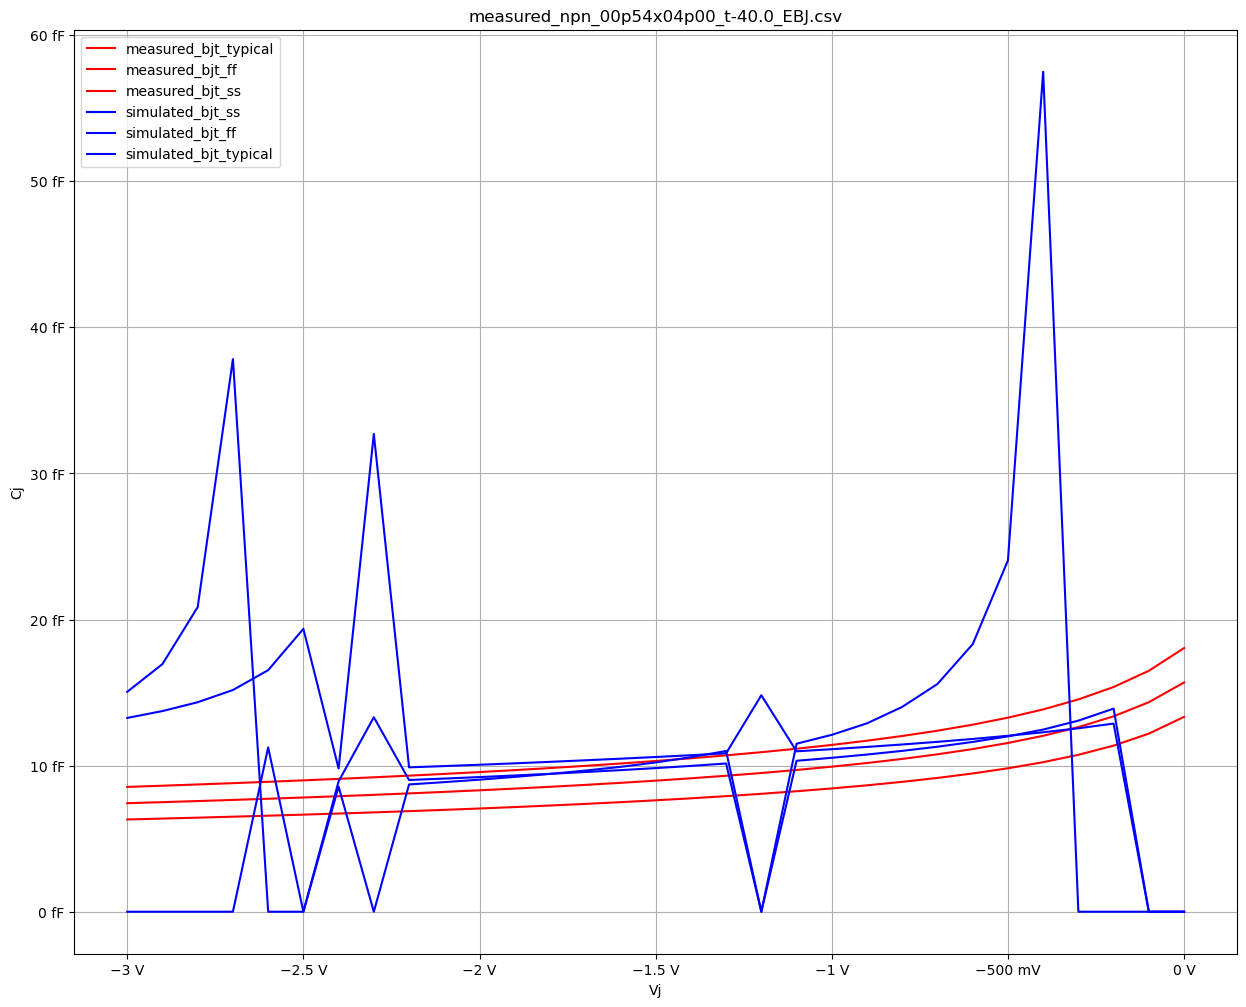

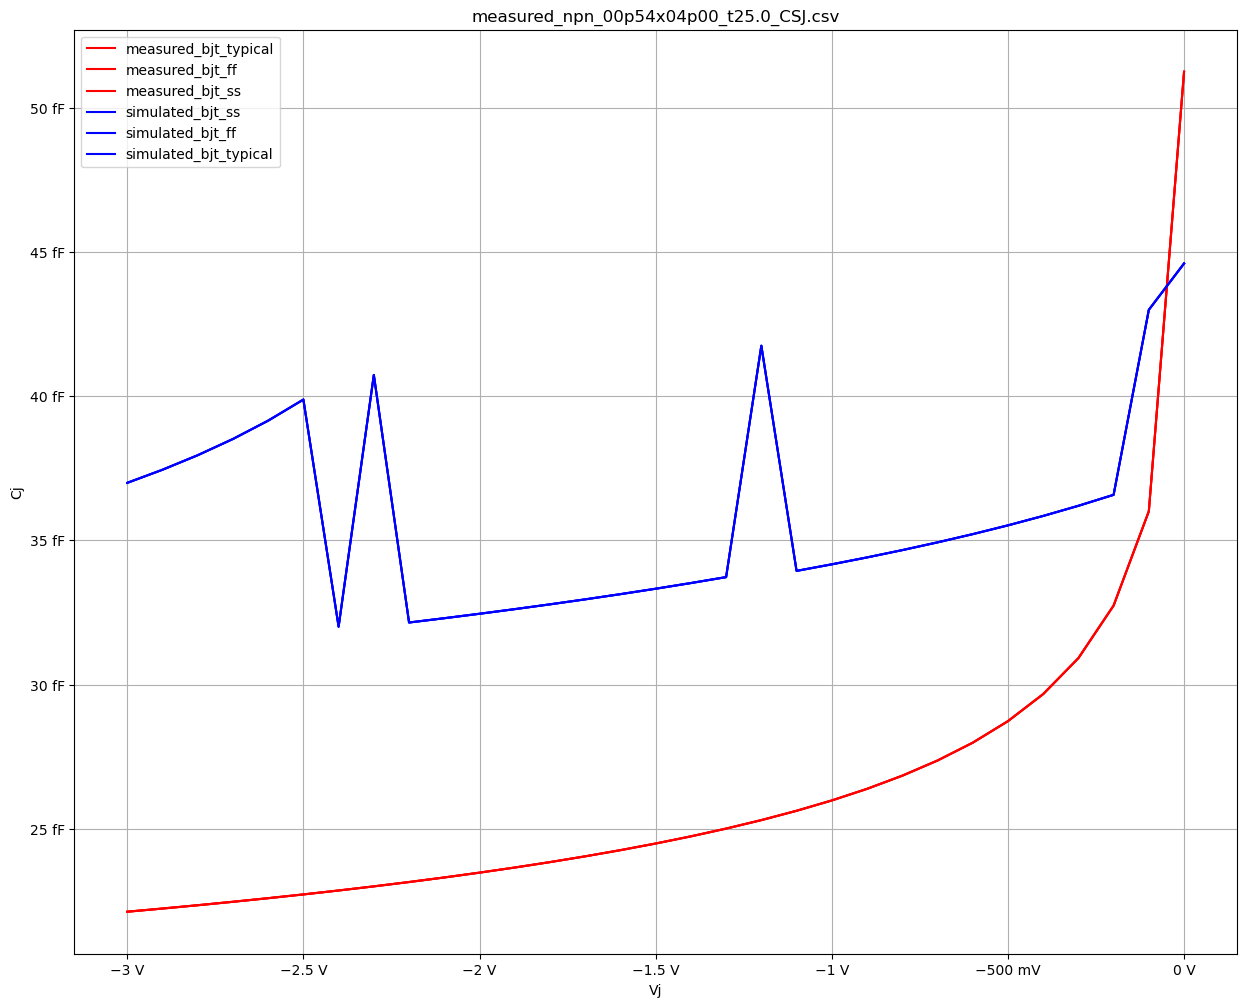

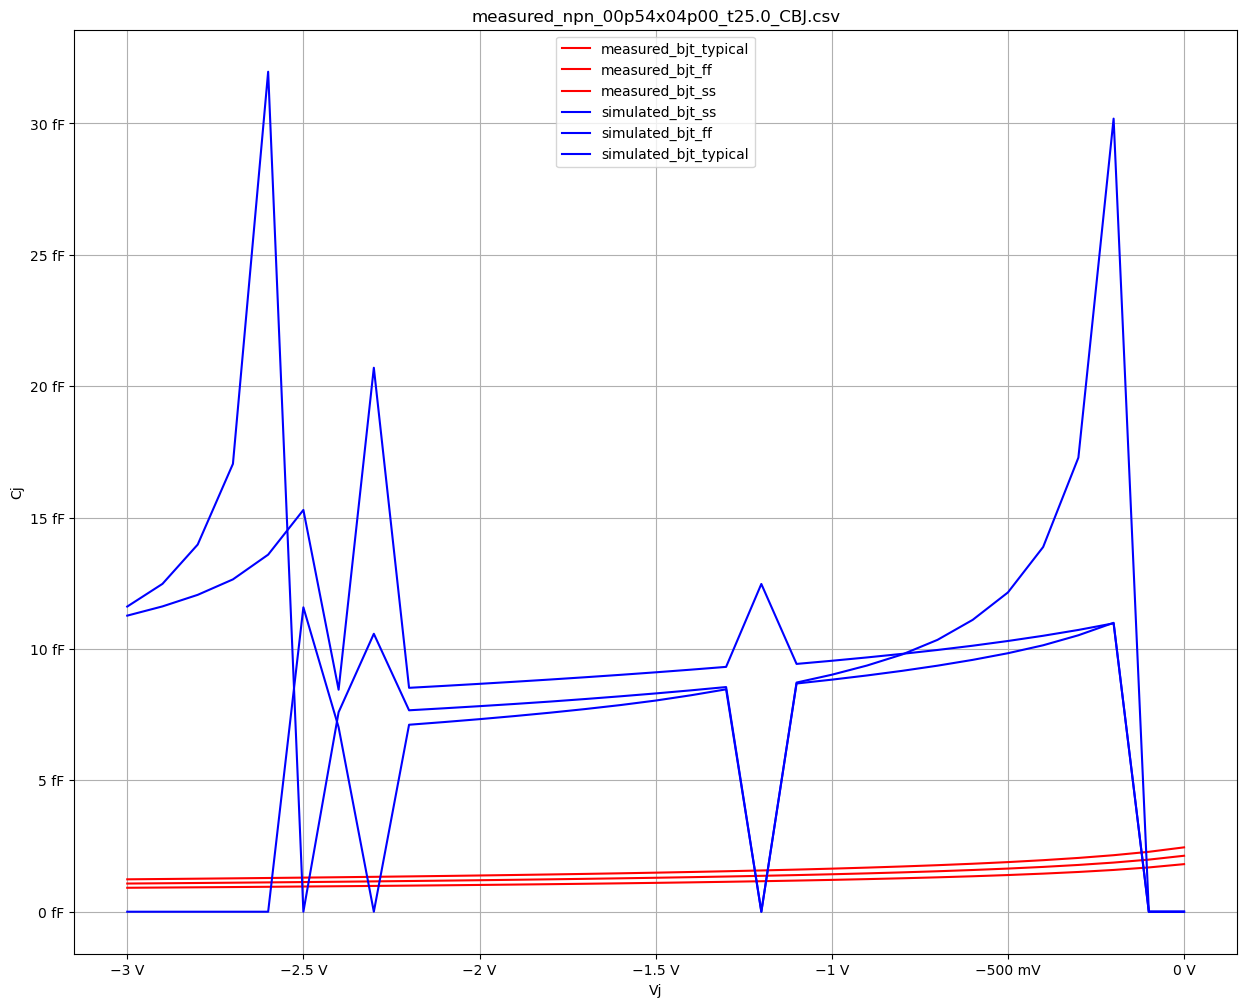

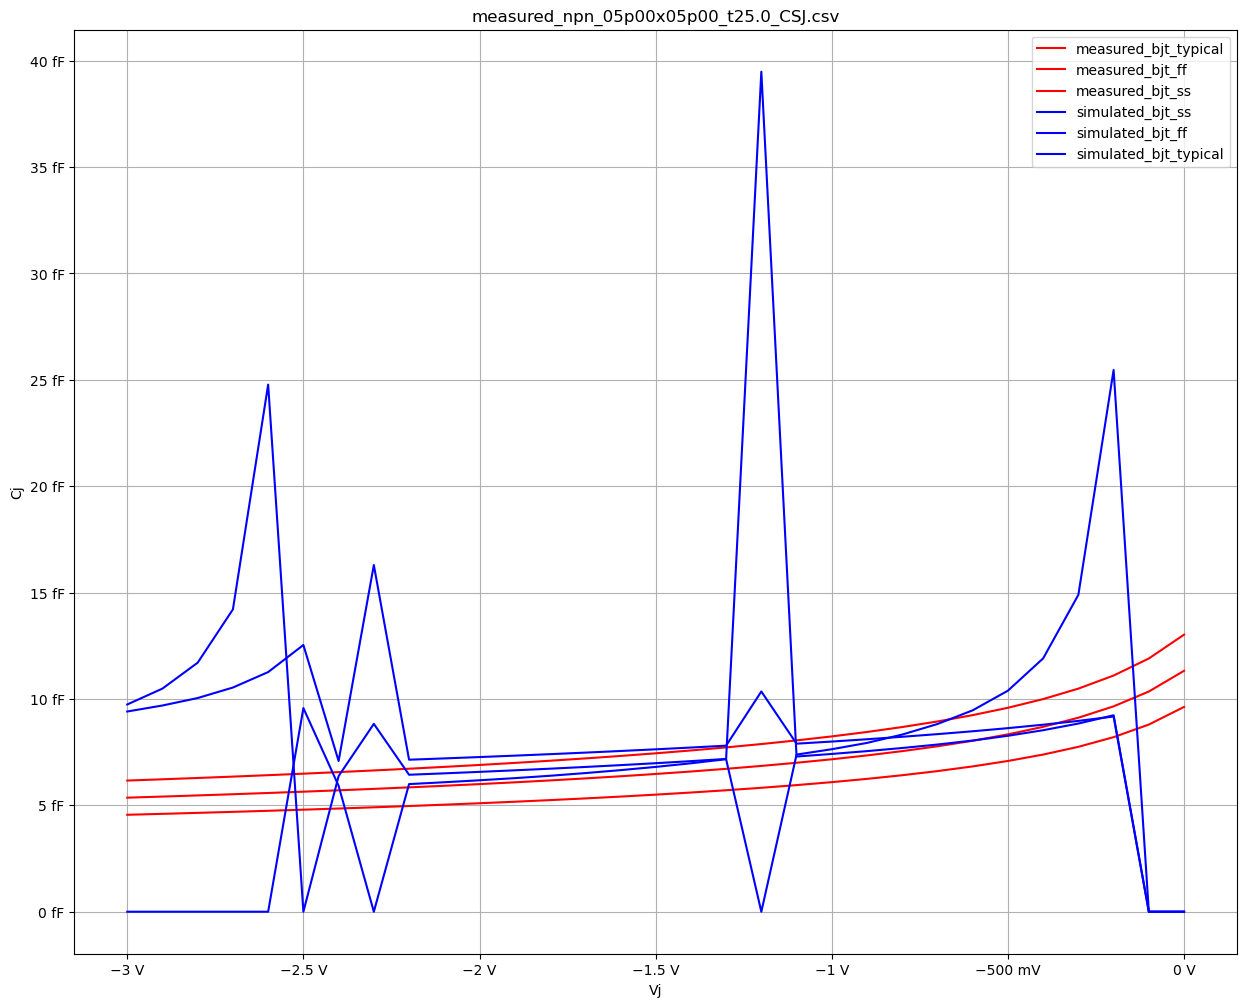

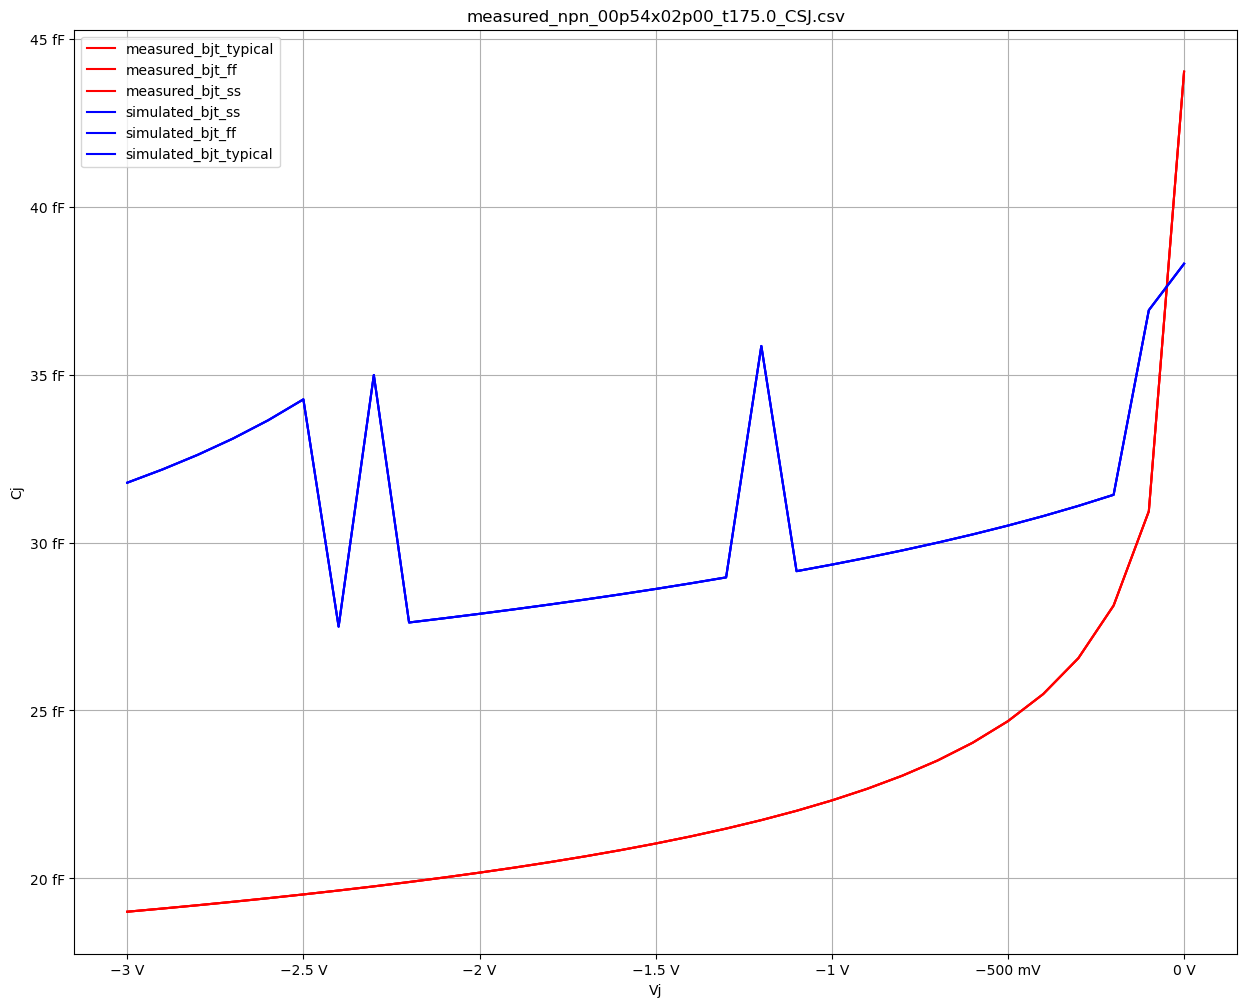

In [15]:
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter
ROWS=31


def draw(measured,sim_path):
    """draw func draw measured data vs simulated data

    Args:
        measured (list[str]): measured files paths
        simulated (list[str]): simulated files paths
    """    
    print("measured is blue")
    print("simulated is red")
    df1 = pd.read_csv(measured)
    for i in range(int(len(df1)/ROWS)):
        df=pd.DataFrame()    
        space = sim_path[i].rfind("/")
        read_dev_name = sim_path[i][space + 1:]
        df1 = pd.read_csv(measured)
        df[0]=df1[df1.columns[0]][i*ROWS:(i+1)*ROWS]
        df[df1.columns[1:4]]=df1[df1.columns[1:4]][i*ROWS:(i+1)*ROWS]
        ax = df.plot(x=df.columns[0], y=df.columns[1:4], color="r", figsize=(15,12))
        volt_formatter = EngFormatter(unit='V')
        amp_formatter = EngFormatter(unit='fF')
        ax.xaxis.set_major_formatter(volt_formatter)
        ax.yaxis.set_major_formatter(amp_formatter)
        df[0]=df1[df1.columns[0]][i*ROWS:(i+1)*ROWS]
        df[df1.columns[4:7]]=df1[df1.columns[4:7]][i*ROWS:(i+1)*ROWS]
        df.plot(ax=ax, x=df.columns[0], y=df.columns[4:7], color="b")
        plt.grid()
        plt.xlabel('Vj')
        plt.ylabel('Cj')
        plt.title(read_dev_name)        
    plt.show()



device = ["npn","pnp"]
# 1 for pnp
# 0 for npn
dev=0
m_path = glob.glob(f"bjt_cj_regr/{device[dev]}/cj_measured/*.csv")
measured = (f"bjt_cj_regr/{device[dev]}/error_analysis.csv")
draw(measured, m_path)
